In [1]:
EXPERIMENT_NOTEBOOK_PATH = "../../reports/experiments/2019-02-08_03-54_FULL_RUN/notebook.csv"
EXP_NO = "02-08"

In [2]:
import os
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

## Load

In [3]:
exp_df = pd.read_csv(EXPERIMENT_NOTEBOOK_PATH)
exp_df.head()

,acc,loss,val_acc,val_loss,trial_no,aug1_type,aug1_magnitude,aug2_type,aug2_magnitude,portion,sample_no,mean_late_val_acc,epoch
0,0.144,2.248,0.190,2.118,1,gamma-contrast,0.844,coarse-salt-pepper,0.847,0.624,1,0.395,1
1,0.227,2.093,0.274,2.047,1,gamma-contrast,0.844,coarse-salt-pepper,0.847,0.624,1,0.395,2
2,0.254,2.042,0.243,2.090,1,gamma-contrast,0.844,coarse-salt-pepper,0.847,0.624,1,0.395,3
3,0.290,1.946,0.240,2.184,1,gamma-contrast,0.844,coarse-salt-pepper,0.847,0.624,1,0.395,4
4,0.323,1.882,0.307,1.922,1,gamma-contrast,0.844,coarse-salt-pepper,0.847,0.624,1,0.395,5


## Preprocess

### correct name of reward

In [4]:
exp_df.rename(columns={"mean_late_val_acc":"reward"}, inplace=True)
exp_df.head()

,acc,loss,val_acc,val_loss,trial_no,aug1_type,aug1_magnitude,aug2_type,aug2_magnitude,portion,sample_no,reward,epoch
0,0.144,2.248,0.190,2.118,1,gamma-contrast,0.844,coarse-salt-pepper,0.847,0.624,1,0.395,1
1,0.227,2.093,0.274,2.047,1,gamma-contrast,0.844,coarse-salt-pepper,0.847,0.624,1,0.395,2
2,0.254,2.042,0.243,2.090,1,gamma-contrast,0.844,coarse-salt-pepper,0.847,0.624,1,0.395,3
3,0.290,1.946,0.240,2.184,1,gamma-contrast,0.844,coarse-salt-pepper,0.847,0.624,1,0.395,4
4,0.323,1.882,0.307,1.922,1,gamma-contrast,0.844,coarse-salt-pepper,0.847,0.624,1,0.395,5


### add epoch info and accuracy overfit

In [5]:
n_epochs = len(exp_df) / len(exp_df["trial_no"].unique()) / len(exp_df["sample_no"].unique())
exp_df["epoch"] = exp_df.index % n_epochs
exp_df["acc_overfit"] = exp_df["acc"] - exp_df["val_acc"]
exp_df.head()

,acc,loss,val_acc,val_loss,trial_no,aug1_type,aug1_magnitude,aug2_type,aug2_magnitude,portion,sample_no,reward,epoch,acc_overfit
0,0.144,2.248,0.190,2.118,1,gamma-contrast,0.844,coarse-salt-pepper,0.847,0.624,1,0.395,0.0,-0.046
1,0.227,2.093,0.274,2.047,1,gamma-contrast,0.844,coarse-salt-pepper,0.847,0.624,1,0.395,1.0,-0.047
2,0.254,2.042,0.243,2.090,1,gamma-contrast,0.844,coarse-salt-pepper,0.847,0.624,1,0.395,2.0,0.011
3,0.290,1.946,0.240,2.184,1,gamma-contrast,0.844,coarse-salt-pepper,0.847,0.624,1,0.395,3.0,0.050
4,0.323,1.882,0.307,1.922,1,gamma-contrast,0.844,coarse-salt-pepper,0.847,0.624,1,0.395,4.0,0.016


## Some info

In [6]:
print (f"number of trials:{exp_df.trial_no.unique().__len__()}")
print (f"number of samples for each trial:{exp_df.sample_no.unique().__len__()}")

number of trials:1091
number of samples for each trial:1


In [7]:
color_palette = ["red","blue","chocolate","salmon","green","pink","orange",
                 "purple","magenta","sienna","teal","khaki","yellow","darkgreen",
                 "darkblue", "cyan","tan","yellowgreen","tomato","olive",
                 "navy","ivory","brown","azure", '#e6194b', '#3cb44b', '#ffe119', '#4363d8', 
                 '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', 
                 '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', 
                 '#000075', '#808080', '#ffffff', '#000000']*300

def plot_exp_lines(exp_df, plot=True):
    
    #plt.figure(figsize=(20,10))
    
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,15))
    fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=0.0)
    
    rowList = []
    for trial_no in exp_df["trial_no"].unique():
        
        if trial_no<1:
            continue
        
        iter_df = exp_df[exp_df["trial_no"]==trial_no].copy()
        
        exp_color = color_palette[trial_no]
        
        if exp_df[exp_df["trial_no"]==trial_no]["portion"].values[0]==0.0:
            exp_color="black"
        
        mean_last_scores = []
        
        if plot==True:
            ############################################################
            # Accuracy plot
            ############################################################
            for sample_id in iter_df["sample_no"].unique():
                sample_df = iter_df[iter_df["sample_no"]==sample_id].copy()
                xs = np.arange(1,51,1)
                axes[0].plot(xs, sample_df["val_acc"], color=exp_color, alpha=0.5, linewidth=2)
                axes[0].plot(xs, sample_df["acc"], '--',color=exp_color, alpha=0.5, linewidth=1)

            axes[0].set_title("validation (straight) and train (dashed) accuracies for child model\n"+\
                      "(each color represents a distinct augmentation strategy) ", fontsize=20)
            axes[0].set_ylabel("accuracy", fontsize=20)

            ############################################################
            # Loss plot
            ############################################################
            for sample_id in iter_df["sample_no"].unique():
                sample_df = iter_df[iter_df["sample_no"]==sample_id].copy()
                xs = np.arange(1,51,1)
                axes[1].plot(xs, sample_df["val_loss"], color=exp_color, alpha=0.5, linewidth=2)
                axes[1].plot(xs, sample_df["loss"], '--',color=exp_color, alpha=0.5, linewidth=1)

            #axes[1].title("validation (straight) and train (dashed) accuracies for child model\n"+\
            #          "(each color represents a distinct augmentation strategy) ", fontsize=20)
            axes[1].set_xlabel("epochs", fontsize=20)
            axes[1].set_ylabel("loss", fontsize=20)
            
        param1 = iter_df["aug1_type"].values[0]
        param2 = iter_df["aug1_magnitude"].values[0]
        param3 = iter_df["aug2_type"].values[0]
        param4 = iter_df["aug2_magnitude"].values[0]
        portion = iter_df["portion"].values[0]
        reward = iter_df["reward"].values[0]
        
        rowList.append([trial_no,param1,param2,param3,param4,portion,reward])
        
    ret_df = pd.DataFrame(rowList, columns=[
        "trial_no","aug1_type","aug1_magnitude", "aug2_type","aug2_magnitude","portion", "reward"]) 
    return ret_df.sort_values("reward", ascending=False)

Total number of trials: 1091


,trial_no,aug1_type,aug1_magnitude,aug2_type,aug2_magnitude,portion,reward
1086,1087,horizontal-flip,0.903,gamma-contrast,0.870,0.929,0.573
1067,1068,horizontal-flip,0.951,gamma-contrast,0.417,0.915,0.564
59,60,crop,0.897,invert,0.024,0.619,0.564
499,500,translate-x,0.334,fog,0.462,0.462,0.561
61,62,crop,0.881,emboss,0.060,0.498,0.559
369,370,add-to-hue-and-saturation,0.478,shear,0.195,0.900,0.558
1007,1008,vertical-flip,0.654,shear,0.207,0.916,0.558
669,670,horizontal-flip,0.334,crop,0.299,0.440,0.558
1078,1079,horizontal-flip,0.897,gamma-contrast,0.944,0.625,0.554
330,331,add-to-hue-and-saturation,0.157,coarse-dropout,0.201,0.986,0.554


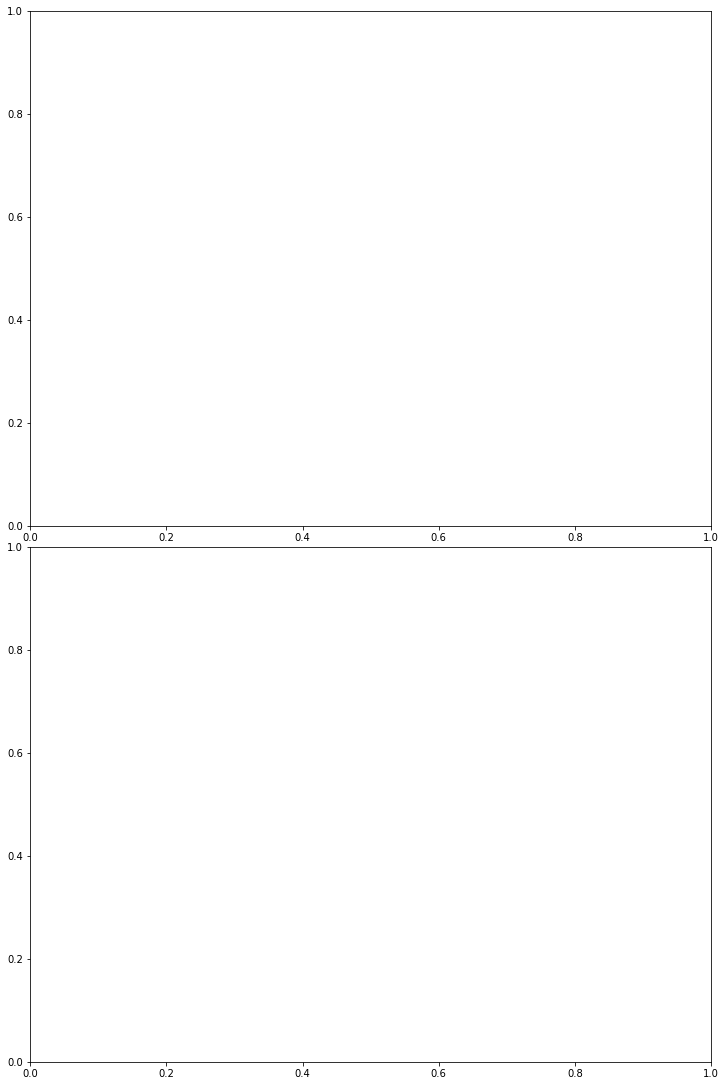

In [8]:
score_df = plot_exp_lines(exp_df, plot=False)
print (f"Total number of trials: {exp_df.trial_no.unique().__len__()}")
score_df[:10]

## Rewards trend

/Users/baris.ozmen/miniconda3/envs/insight/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


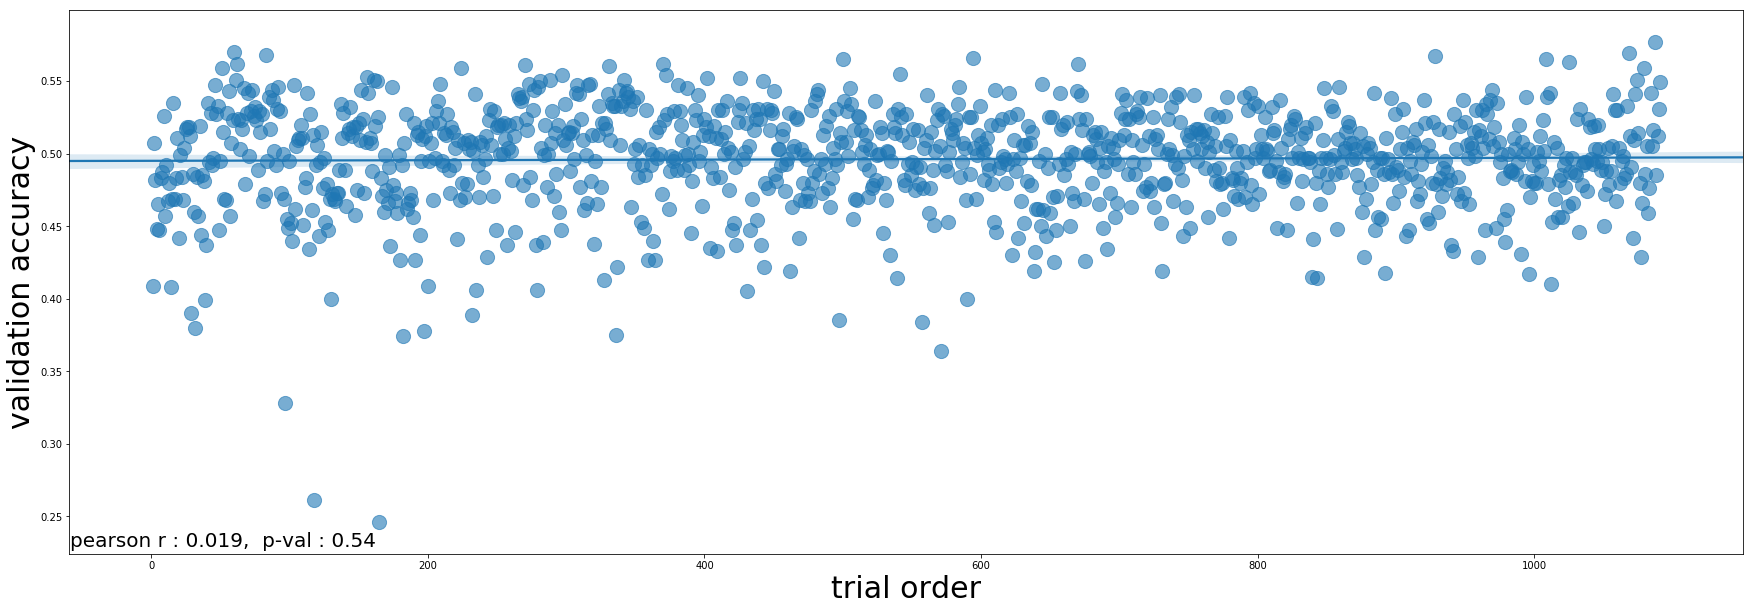

In [9]:
import seaborn as sns

df = (exp_df[exp_df["acc_overfit"]<0.05]
     .sort_values("val_acc", ascending=False)
     .drop_duplicates(["trial_no","sample_no"])
)[["trial_no","val_acc"]]

plt.figure(figsize=(30,10))
for trial_no in df["trial_no"].unique():
    val_accs = df[df["trial_no"]==trial_no]["val_acc"].values
    plt.plot([trial_no, trial_no],[min(val_accs), max(val_accs)], color='black', alpha=0.8)

ax = sns.regplot(x="trial_no", y="val_acc", data=df, scatter_kws={'s':200,'alpha':0.6})

from scipy.stats import pearsonr
r , p = pearsonr(df["trial_no"].values,df["val_acc"].values)

plt.text(plt.xlim()[0]+0.5,plt.ylim()[0]+0.005, f"pearson r : {r:.2},  p-val : {p:.2}", fontsize=20)

plt.xlabel("trial order", fontsize=30)
plt.ylabel("validation accuracy", fontsize=30)

del df

## How frequency of augmented images affect accuracy?

Text(0, 0.5, 'val_acc')

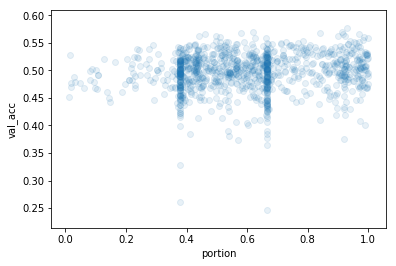

In [10]:
df = (exp_df[exp_df["acc_overfit"]<0.05]
         .sort_values("val_acc", ascending=False)
         .drop_duplicates(["trial_no","sample_no"])
     )[["portion","val_acc"]]

plt.scatter(df["portion"], df["val_acc"], alpha=0.1)
plt.xlabel("portion")
plt.ylabel("val_acc")

In [11]:
from scipy.stats import pearsonr

pearsonr(df["portion"], df["val_acc"])

(0.10596786989308693, 0.00045487365455715723)

In [12]:
exp_df.drop_duplicates("trial_no")["portion"].unique().__len__()

518

# Top 5 policy accuracy curves (they're overfitting for augmentation)

,trial_no,aug1_type,aug1_magnitude,aug2_type,aug2_magnitude,portion,reward
4,1087,horizontal-flip,0.903,gamma-contrast,0.870,0.929,0.573
0,60,crop,0.897,invert,0.024,0.619,0.564
3,1068,horizontal-flip,0.951,gamma-contrast,0.417,0.915,0.564
2,500,translate-x,0.334,fog,0.462,0.462,0.561
1,62,crop,0.881,emboss,0.060,0.498,0.559


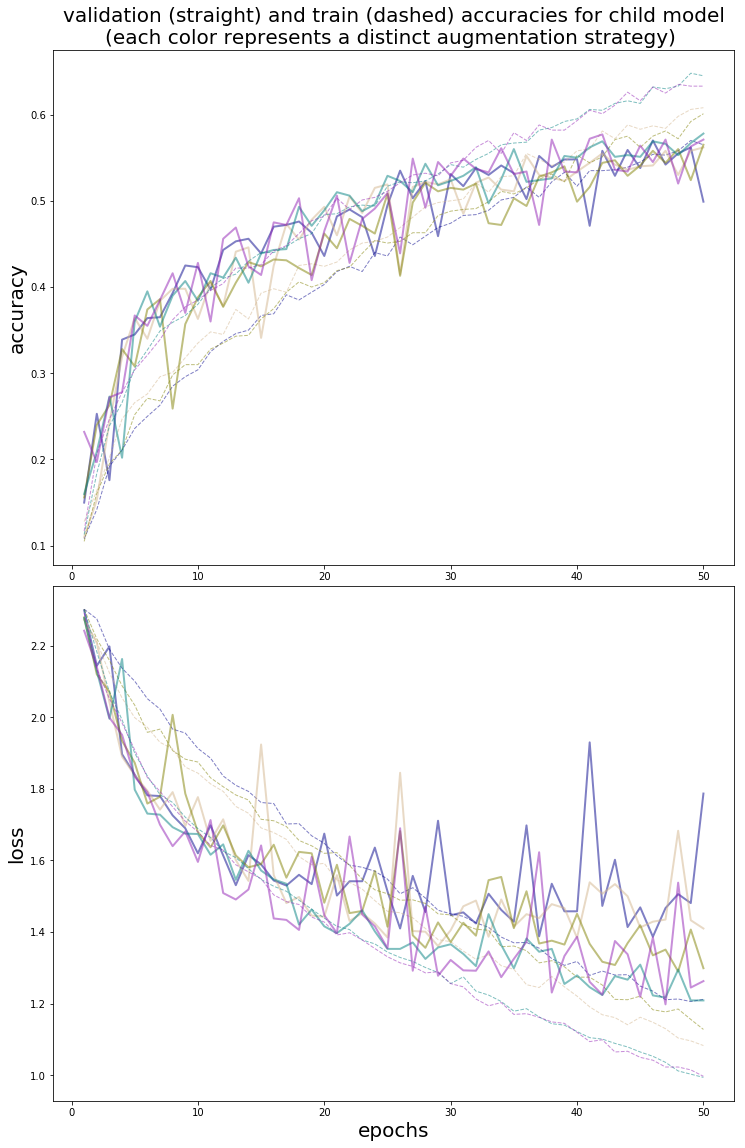

In [13]:
top_policy_trial_no_arr = score_df[:5].trial_no.values
plot_exp_lines(exp_df[exp_df["trial_no"].isin(top_policy_trial_no_arr)])

# Bottom 5 policy accuracy curves

,trial_no,aug1_type,aug1_magnitude,aug2_type,aug2_magnitude,portion,reward
4,336,horizontal-flip,0.516,shear,0.207,0.921,0.322
3,197,brighten,0.295,shear,0.186,0.665,0.319
2,182,dropout,0.335,shear,0.051,0.569,0.316
0,118,rotate,0.334,shear,0.286,0.378,0.182
1,165,shear,0.340,shear,0.207,0.665,0.182


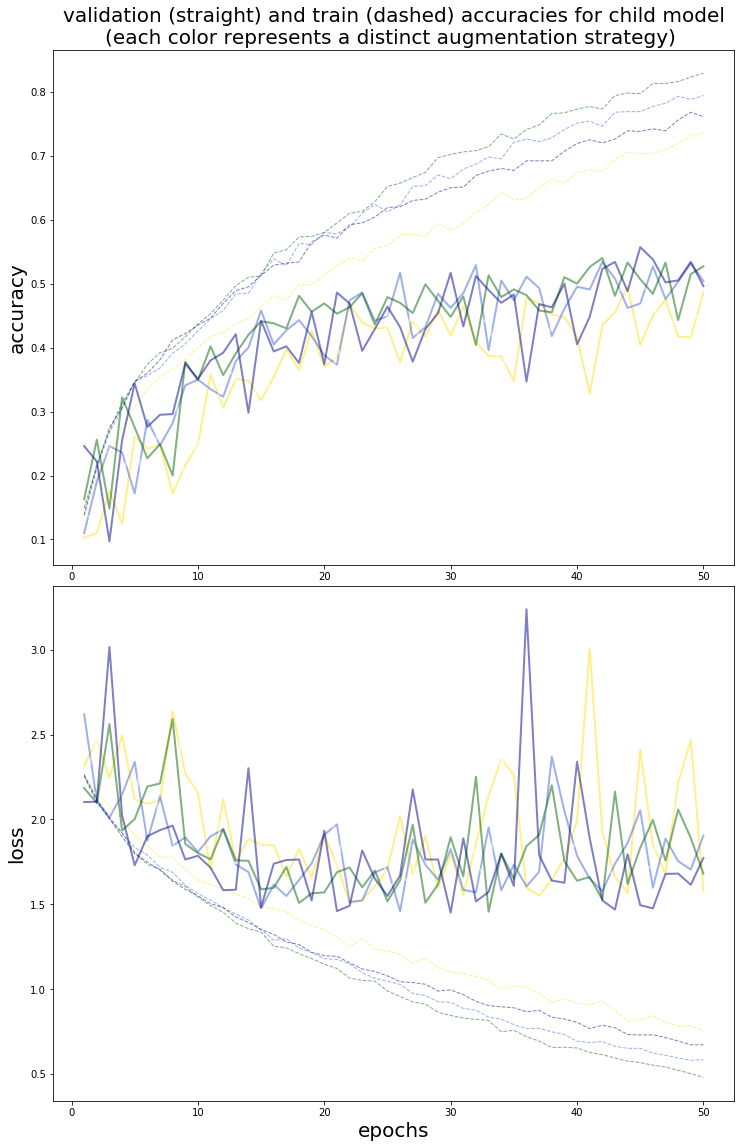

In [14]:
worst_policy_trial_no_arr = score_df[-5:].trial_no.values
plot_exp_lines(exp_df[exp_df["trial_no"].isin(worst_policy_trial_no_arr)])

In [15]:
import sys
sys.path.insert(0,"../../")

from deepaugment.augmenter import Augmenter
augmenter=Augmenter()

In [16]:
from PIL import Image

from imgaug import augmenters as iaa

import sys
sys.path.insert(0,"../../")
from deepaugment.build_features import DataOp

Using TensorFlow backend.


In [17]:
data, input_shape = DataOp.load("cifar10",1000)
data = DataOp.preprocess(data)

Using 1000 training images


In [18]:
def display_images(X, nrows=2, ncols=4):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*10,nrows*10))
    fig.tight_layout()

    for i,im_arr in enumerate(X[:(nrows*ncols)]):
        axes[int(i/ncols)][i%ncols].imshow(im_arr)
        
def display_images_comperatively(X,X_aug,nrows=2, ncols=4):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*10,nrows*10))
    fig.tight_layout()

    for i,im_arr in enumerate(X[:(nrows*ncols)]):
        if i%2==0:
            axes[int(i/ncols)][i%ncols].imshow(X[i])
            axes[int((i+1)/ncols)][(i+1)%ncols].imshow(X_aug[i])

            
def display_augmentation_by_trial_no(trial_no, exp_df, data, nrows=2, ncols=4):
    trial_df = exp_df[exp_df["trial_no"]==trial_no]
    trial_hyperparams = [trial_df.iloc[0,5],trial_df.iloc[0,6],
                         trial_df.iloc[0,7],trial_df.iloc[0,8],
                         1.0] # proportion always 1

    aug_data = augmenter.run(data["X_train"], data["y_train"],*trial_hyperparams)

    print (trial_hyperparams)
    display_images_comperatively(data["X_train"], aug_data["X_train"], nrows, ncols)
    
def display_augmentation_by_steps(trial_no, df, data, nrows=4):
    from deepaugment.augmenter import transform
    trial_df = df[df["trial_no"]==trial_no]
    
    hyperparams = [trial_df.iloc[0,5],trial_df.iloc[0,6],
                   trial_df.iloc[0,7],trial_df.iloc[0,8],
                   1.0] # proportion always 1
    
    print ("hyperparams:",hyperparams)
    
    X = data["X_train"]
    X_aug_1 = transform(hyperparams[0], hyperparams[1], X)
    X_aug_2 = transform(hyperparams[2], hyperparams[3], X_aug_1)
    
    ncols=4
    fig, axes = plt.subplots(nrows=nrows, ncols=4, figsize=(ncols*10,nrows*10))
    fig.tight_layout()
    fig.suptitle("smt")
    
    for i,im_arr in enumerate(X[:(nrows*ncols)]):
        if i%4==0:
            axes[int(i/ncols)][i%ncols].imshow(X[i])
            axes[int((i+1)/ncols)][(i+1)%ncols].imshow(X_aug_1[i])
            axes[int((i+2)/ncols)][(i+2)%ncols].imshow(X_aug_2[i])
    


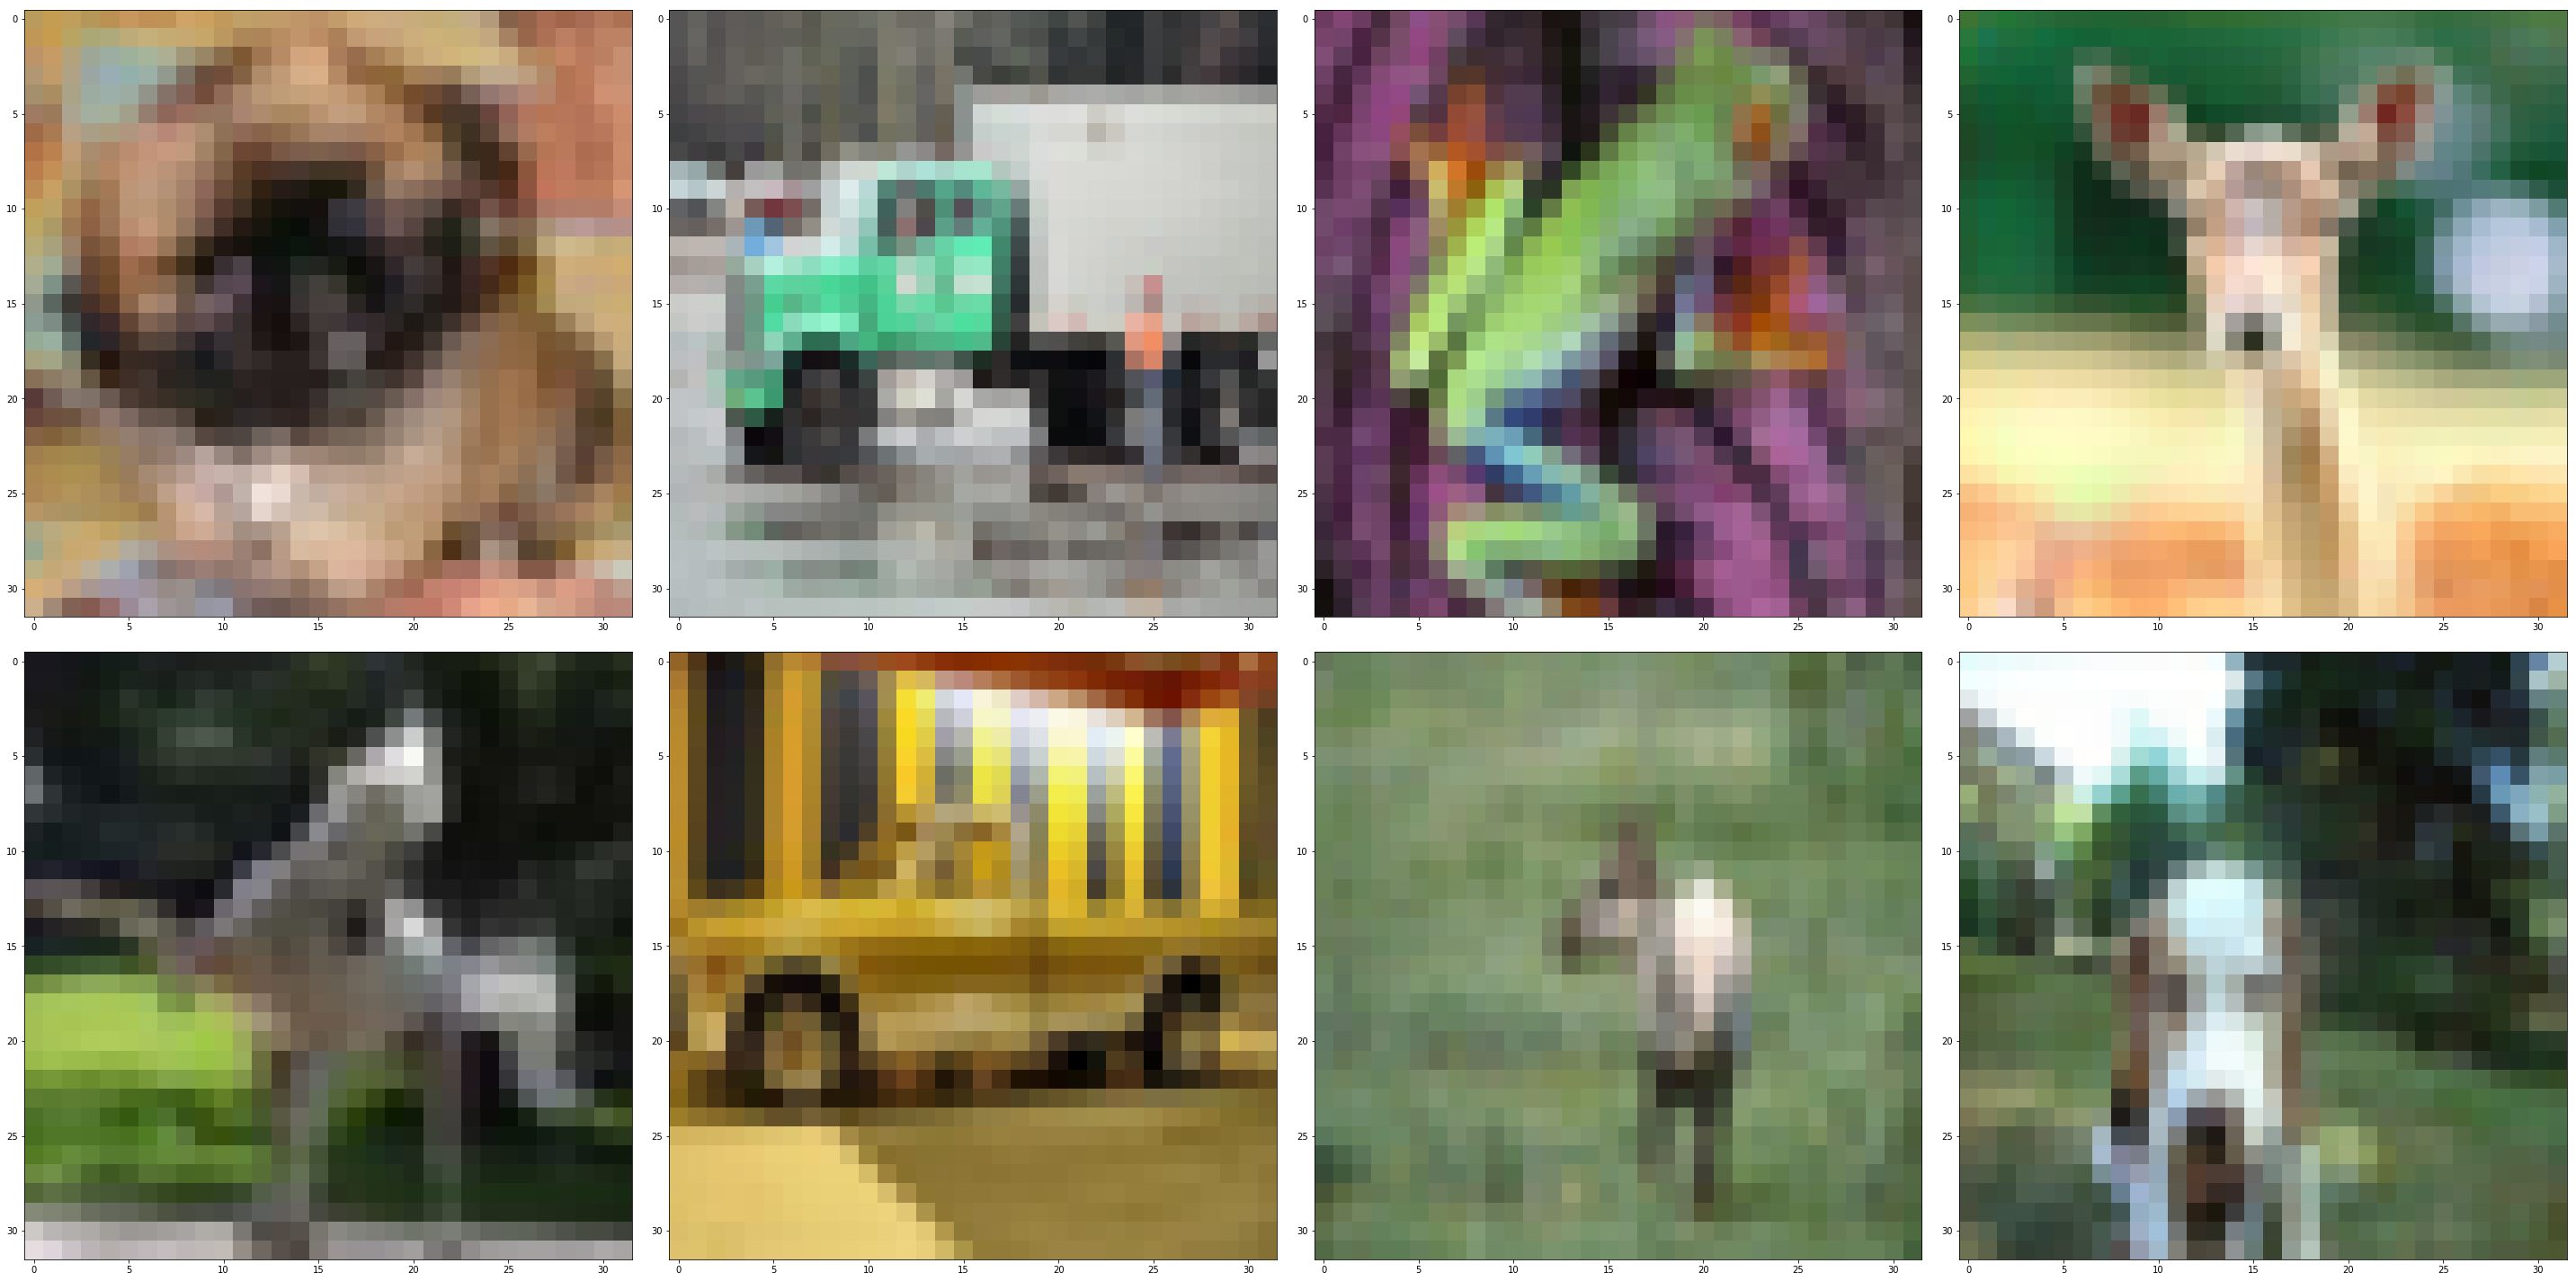

In [64]:
display_images(data["X_train"][120:150])

['dropout', 0.8009999999999999, 'coarse-dropout', 0.679, 1.0]


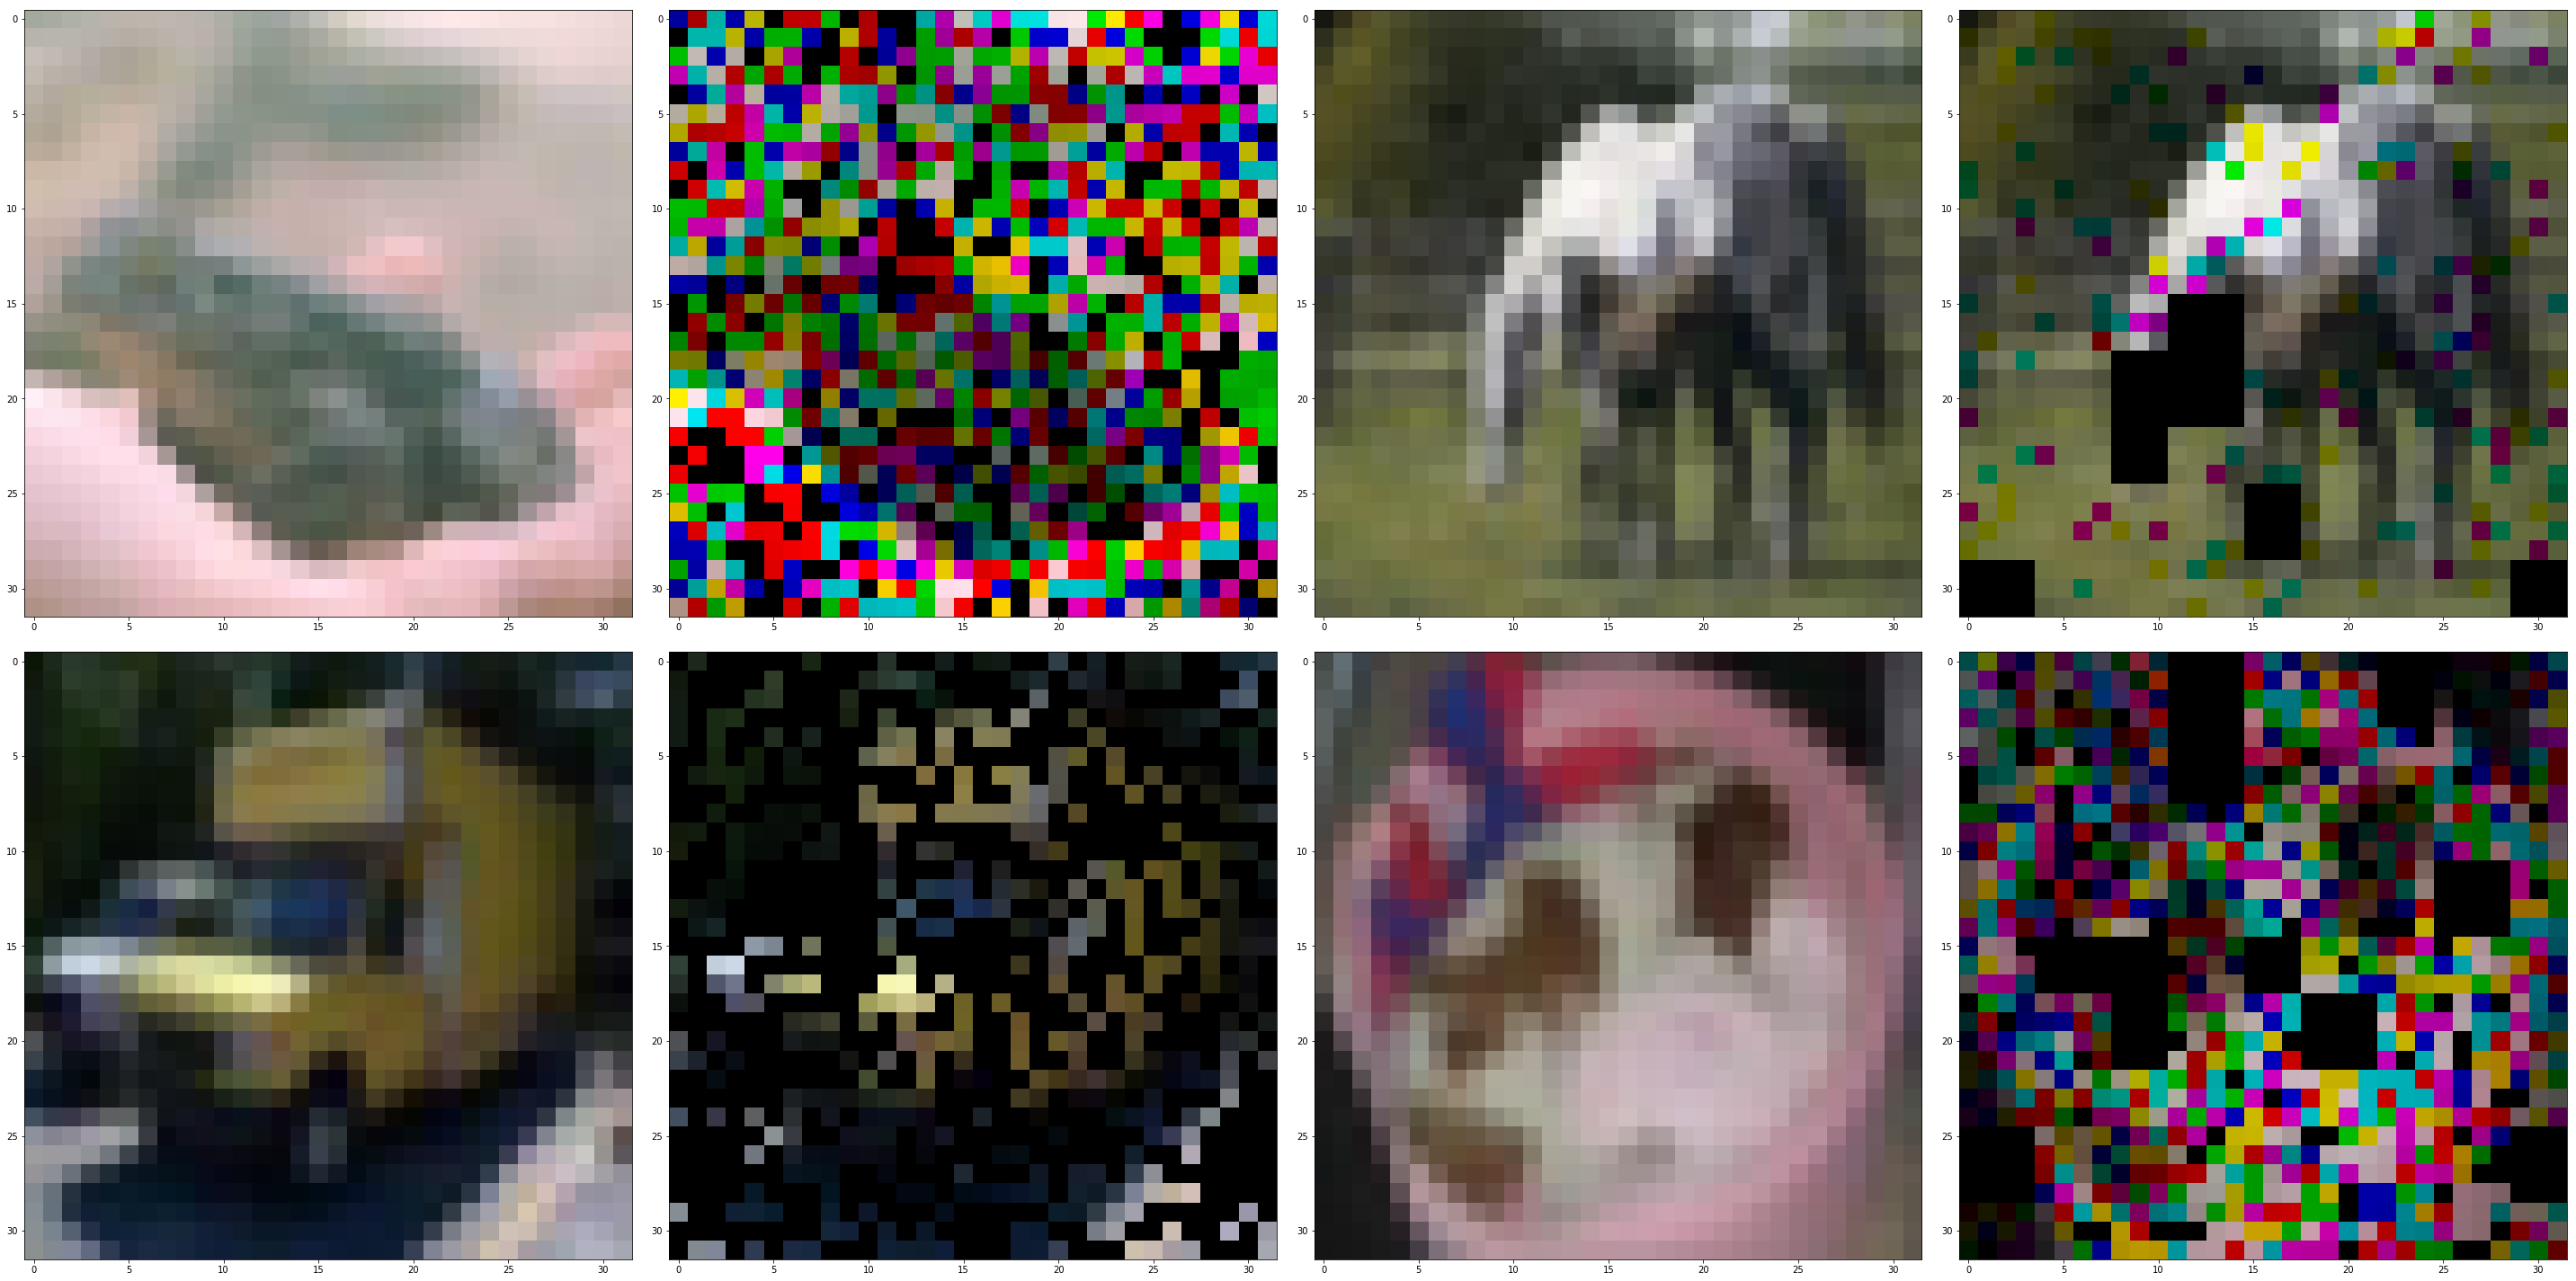

In [20]:
display_augmentation_by_trial_no(5, exp_df, data)

# Overfitting augmentations

1087
['horizontal-flip', 0.903, 'gamma-contrast', 0.87, 1.0]
1068
['horizontal-flip', 0.951, 'gamma-contrast', 0.41700000000000004, 1.0]
60
['crop', 0.897, 'invert', 0.024, 1.0]
500
['translate-x', 0.33399999999999996, 'fog', 0.462, 1.0]
62
['crop', 0.8809999999999999, 'emboss', 0.06, 1.0]


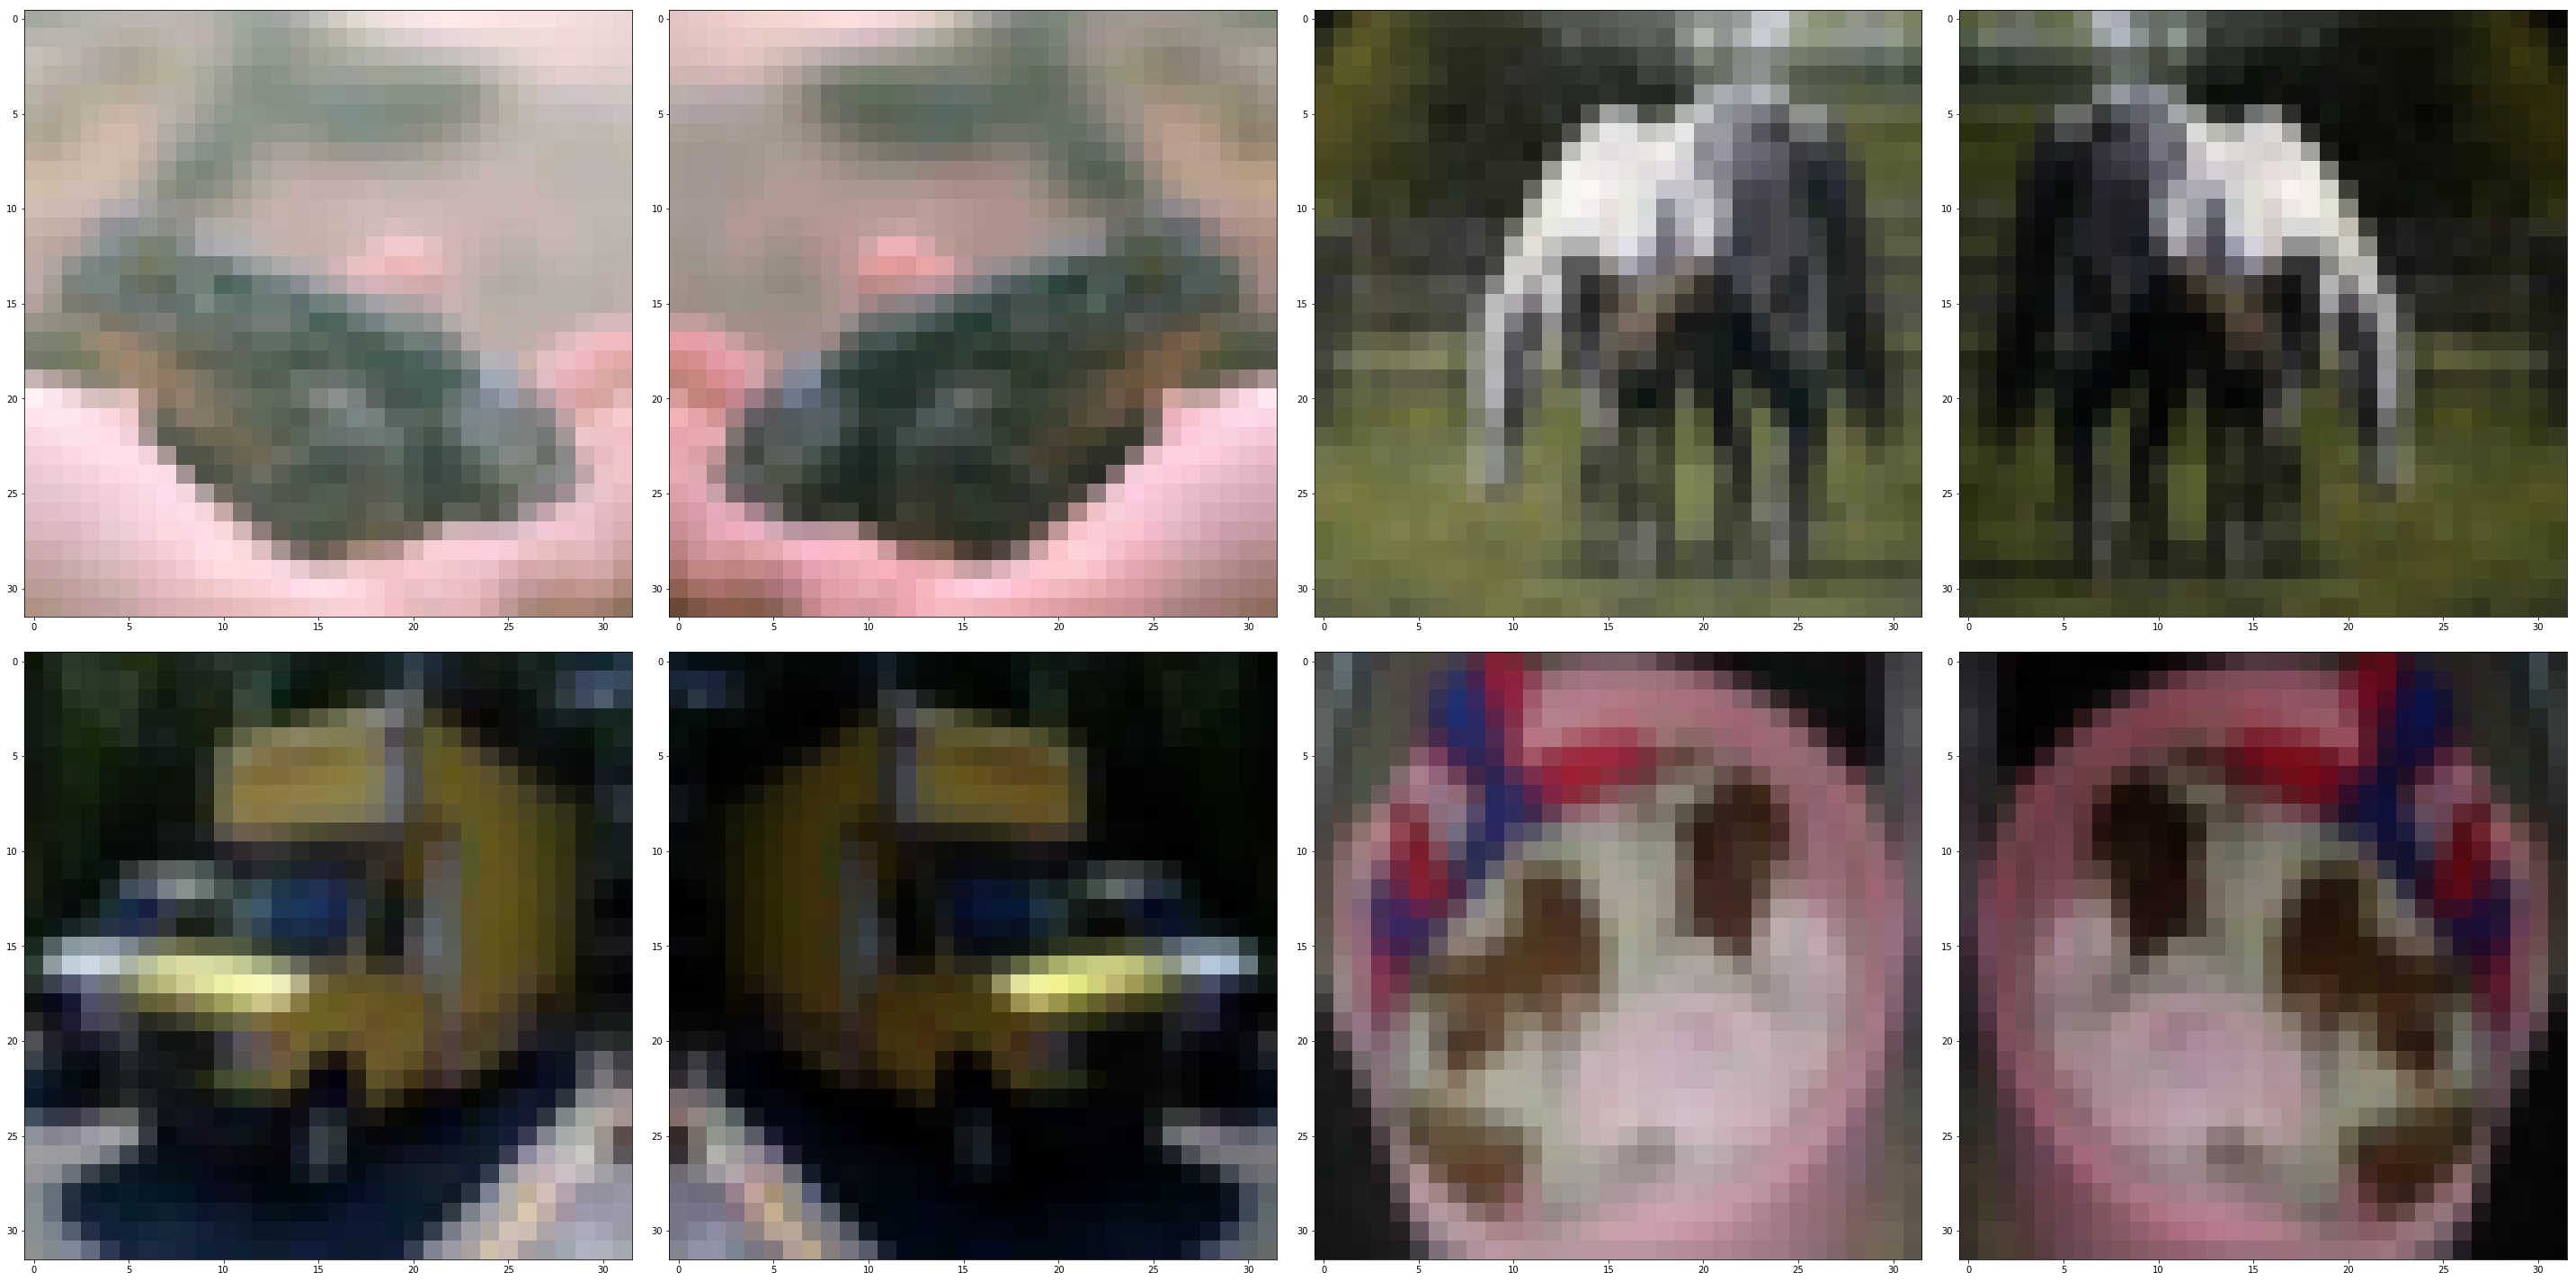

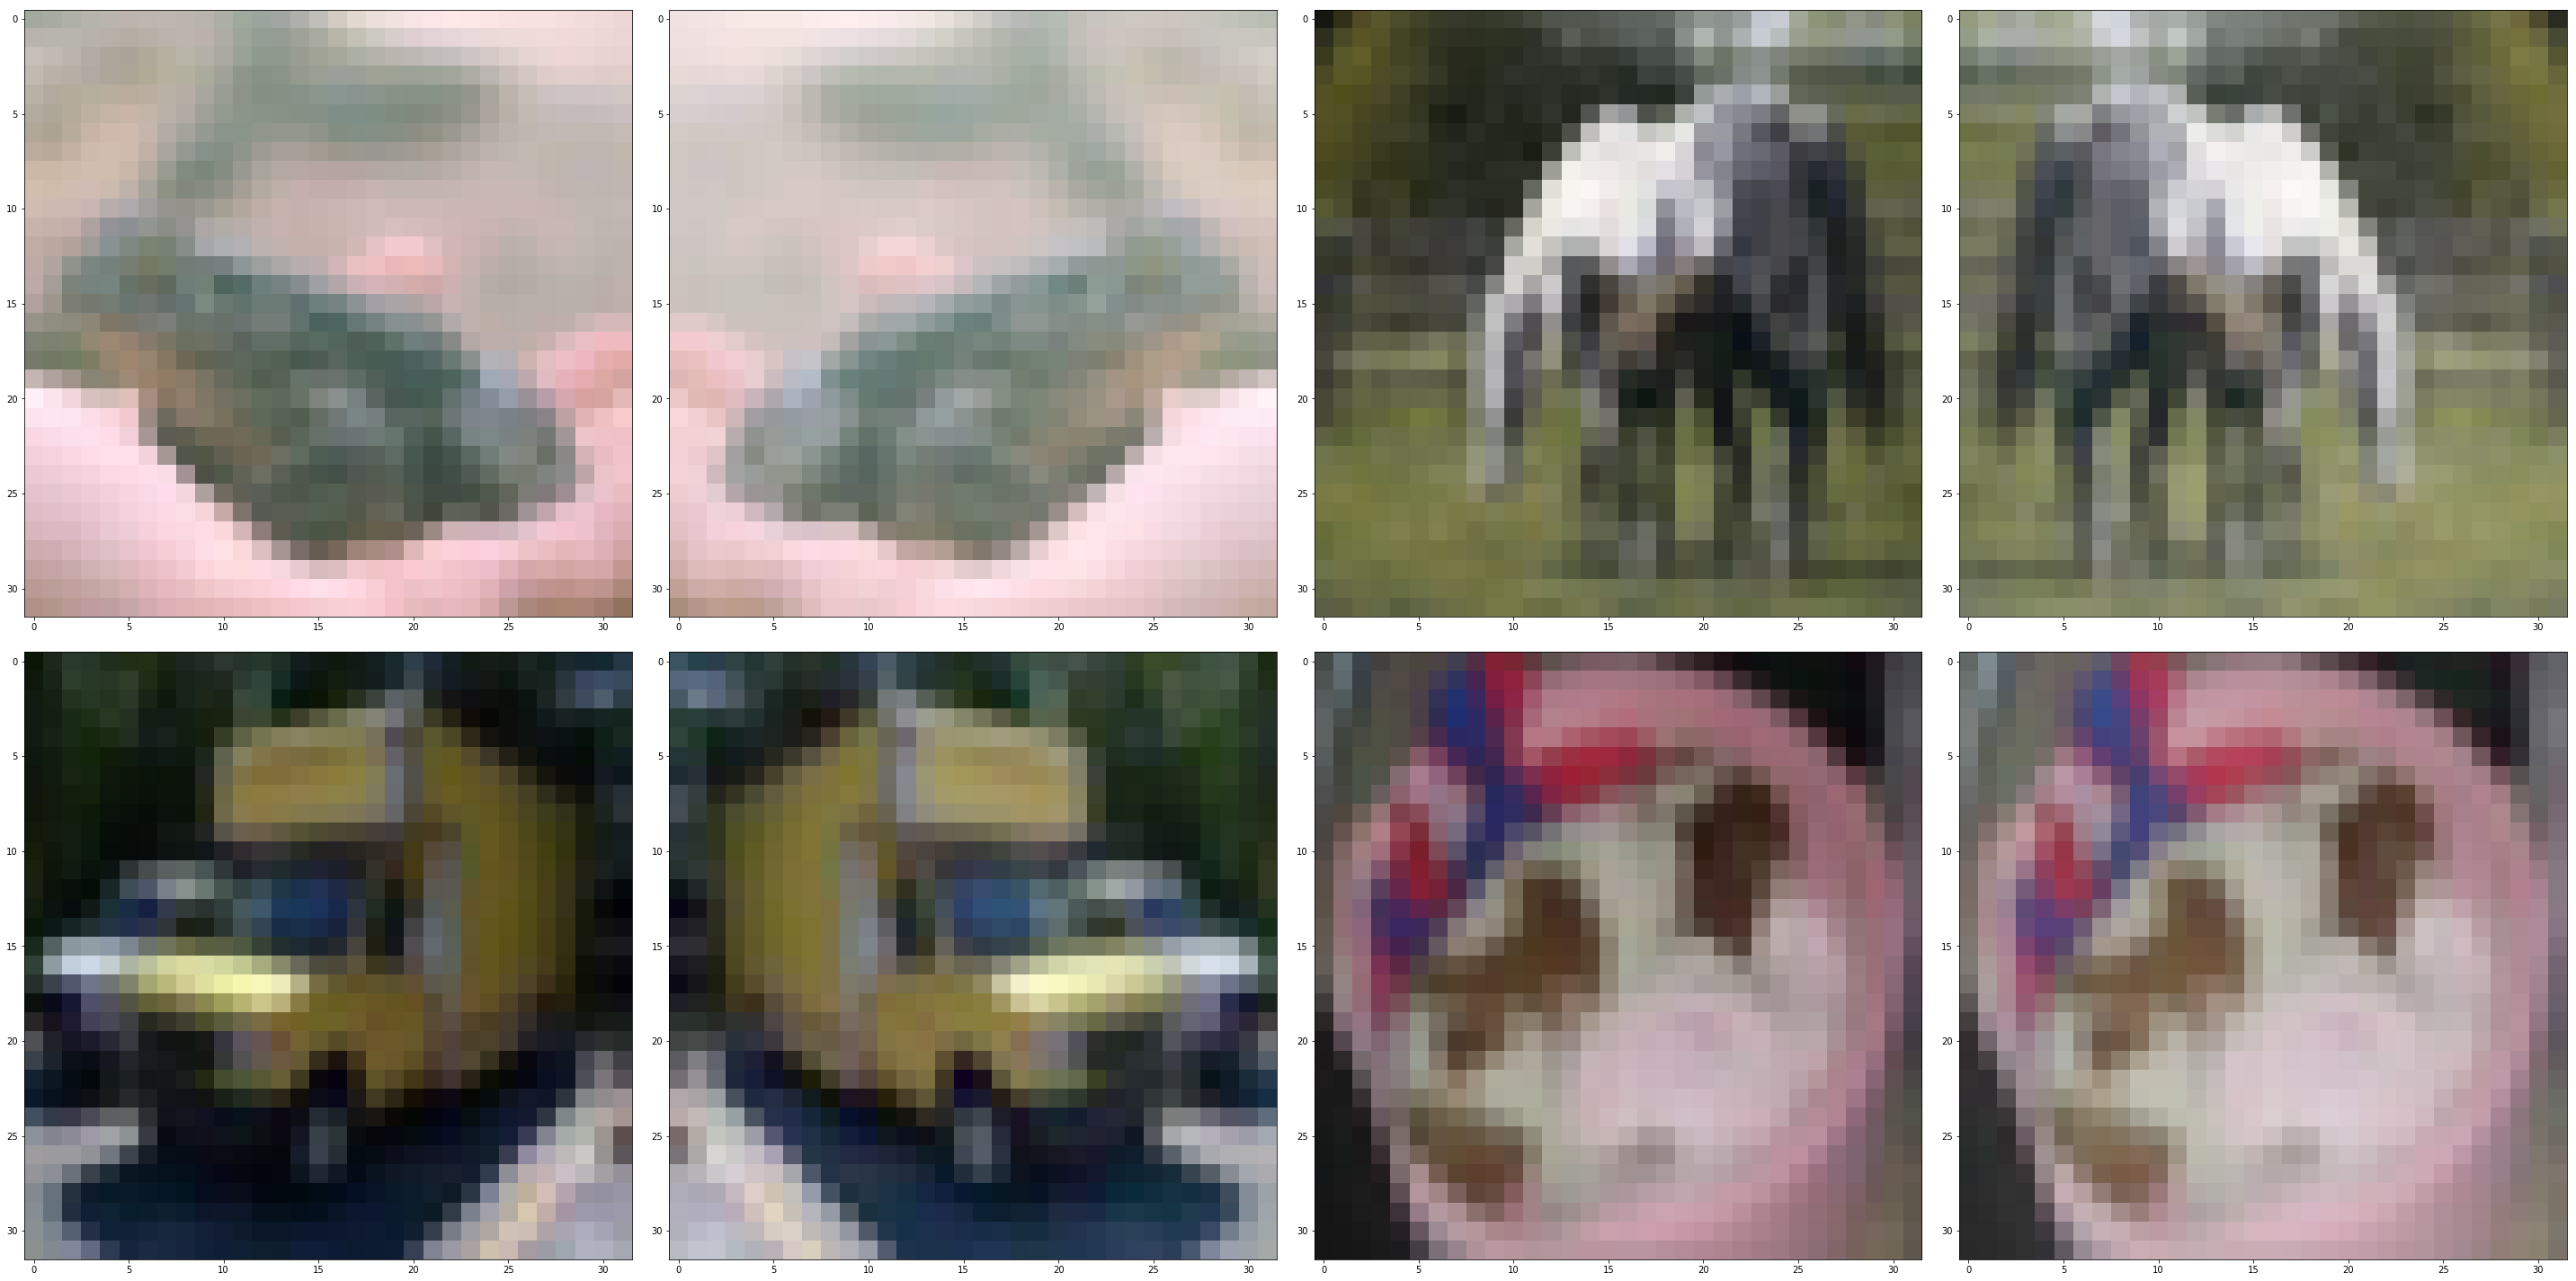

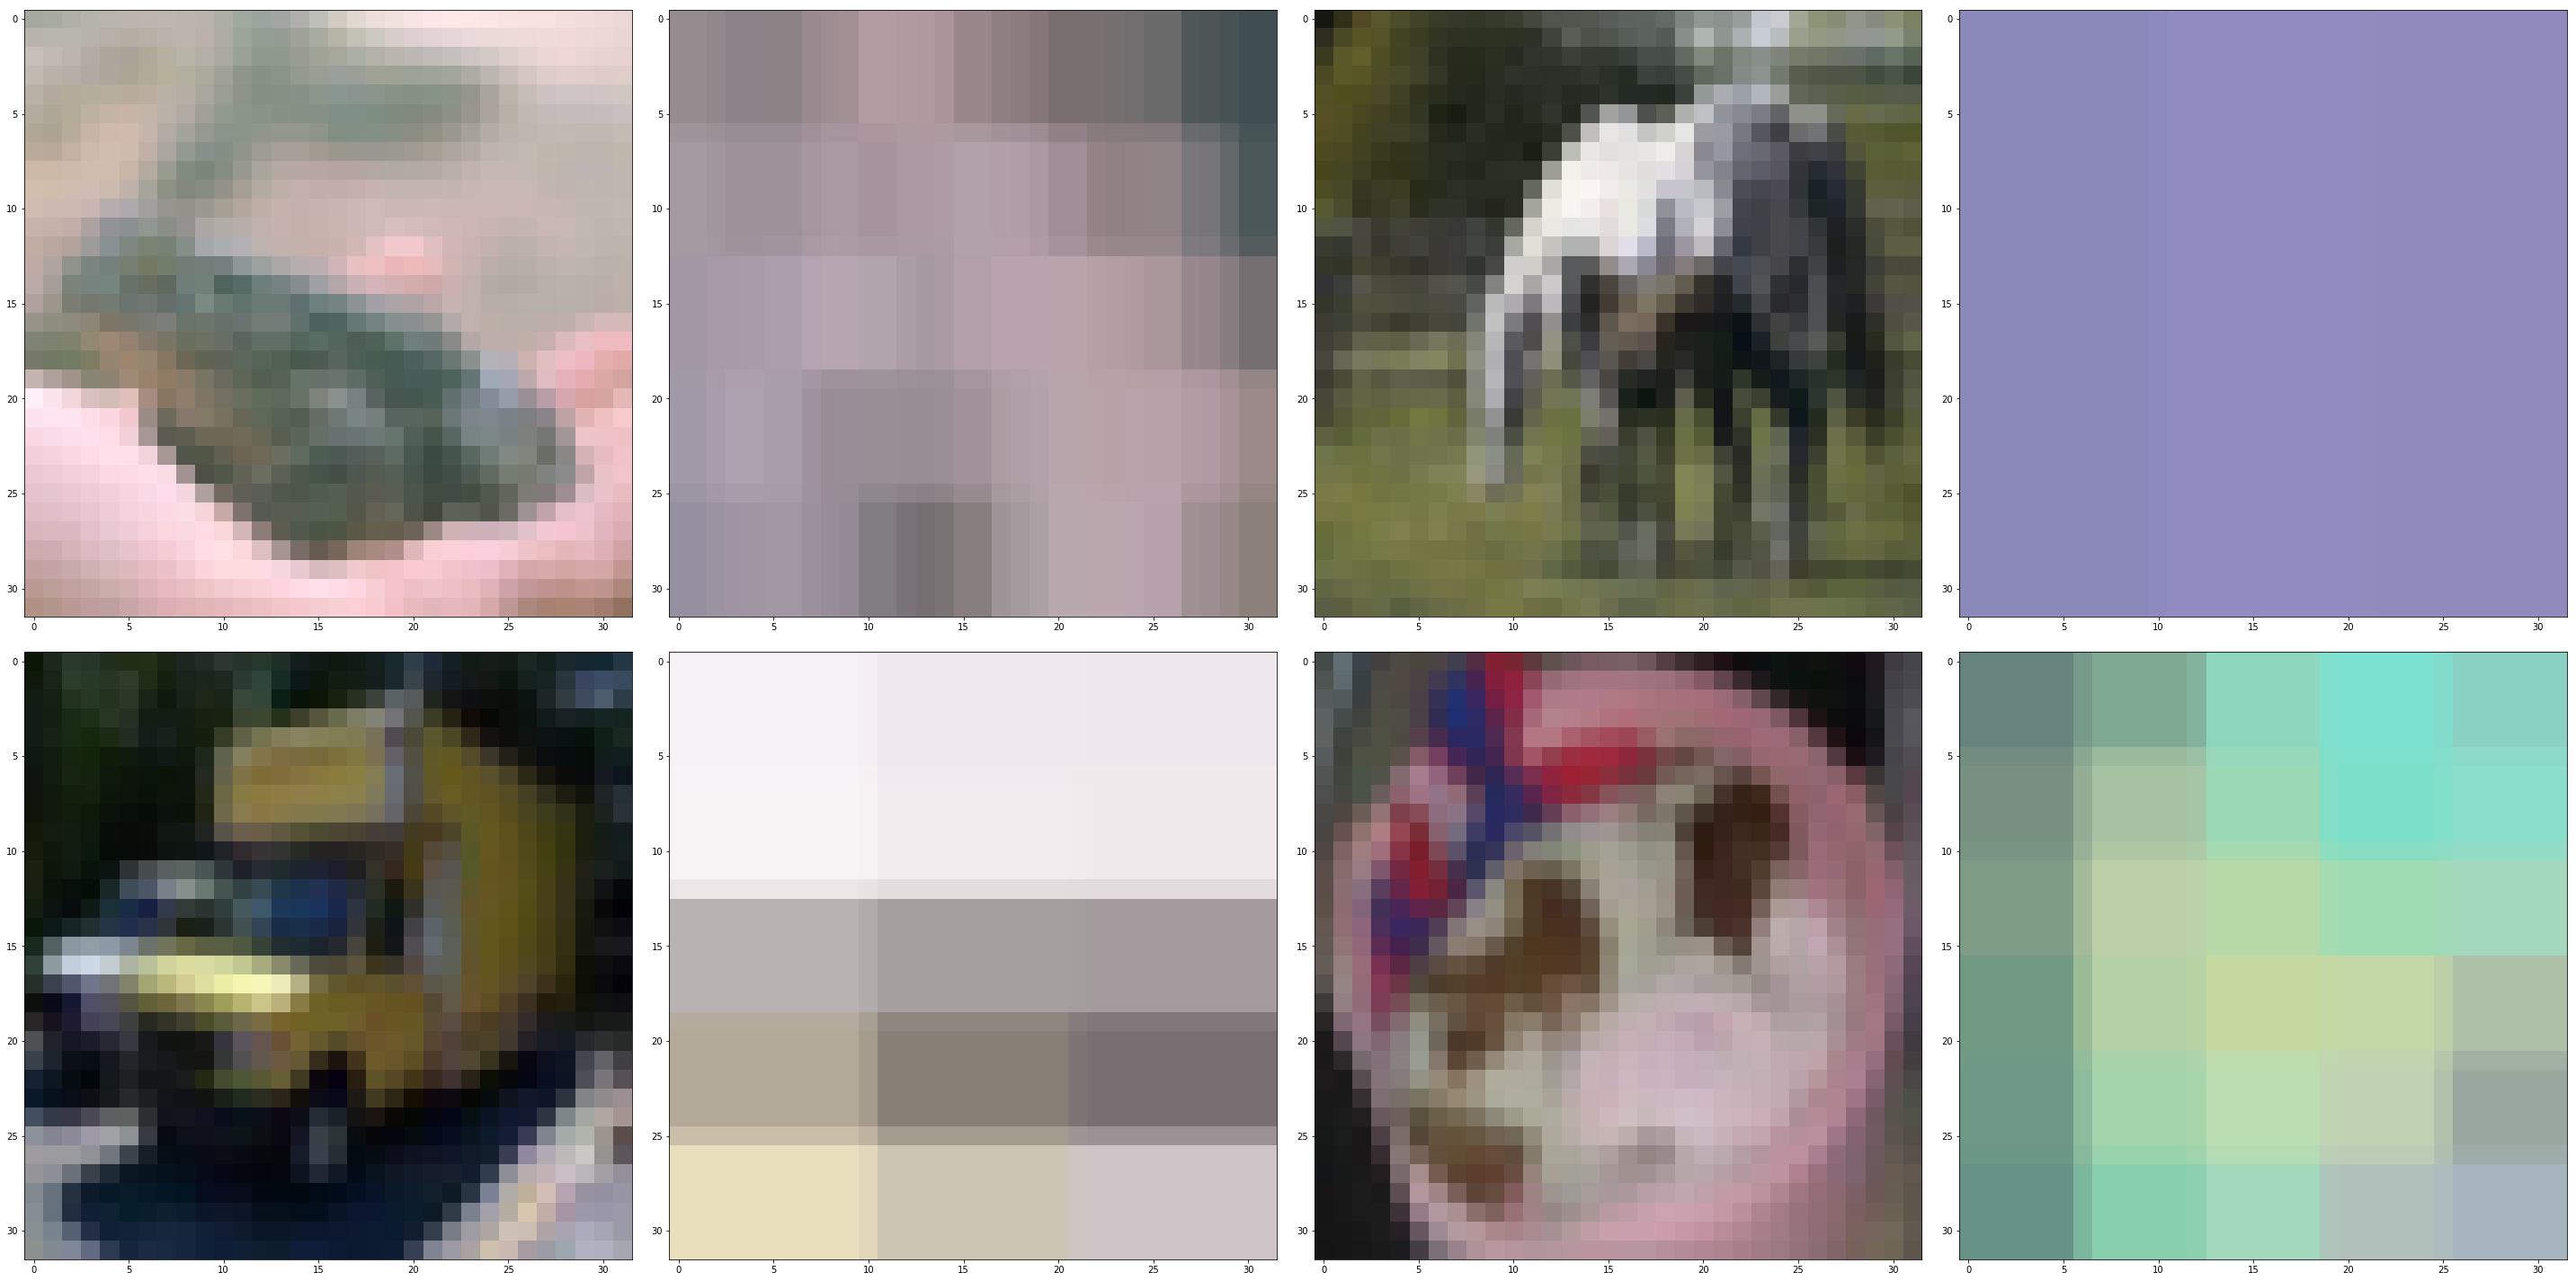

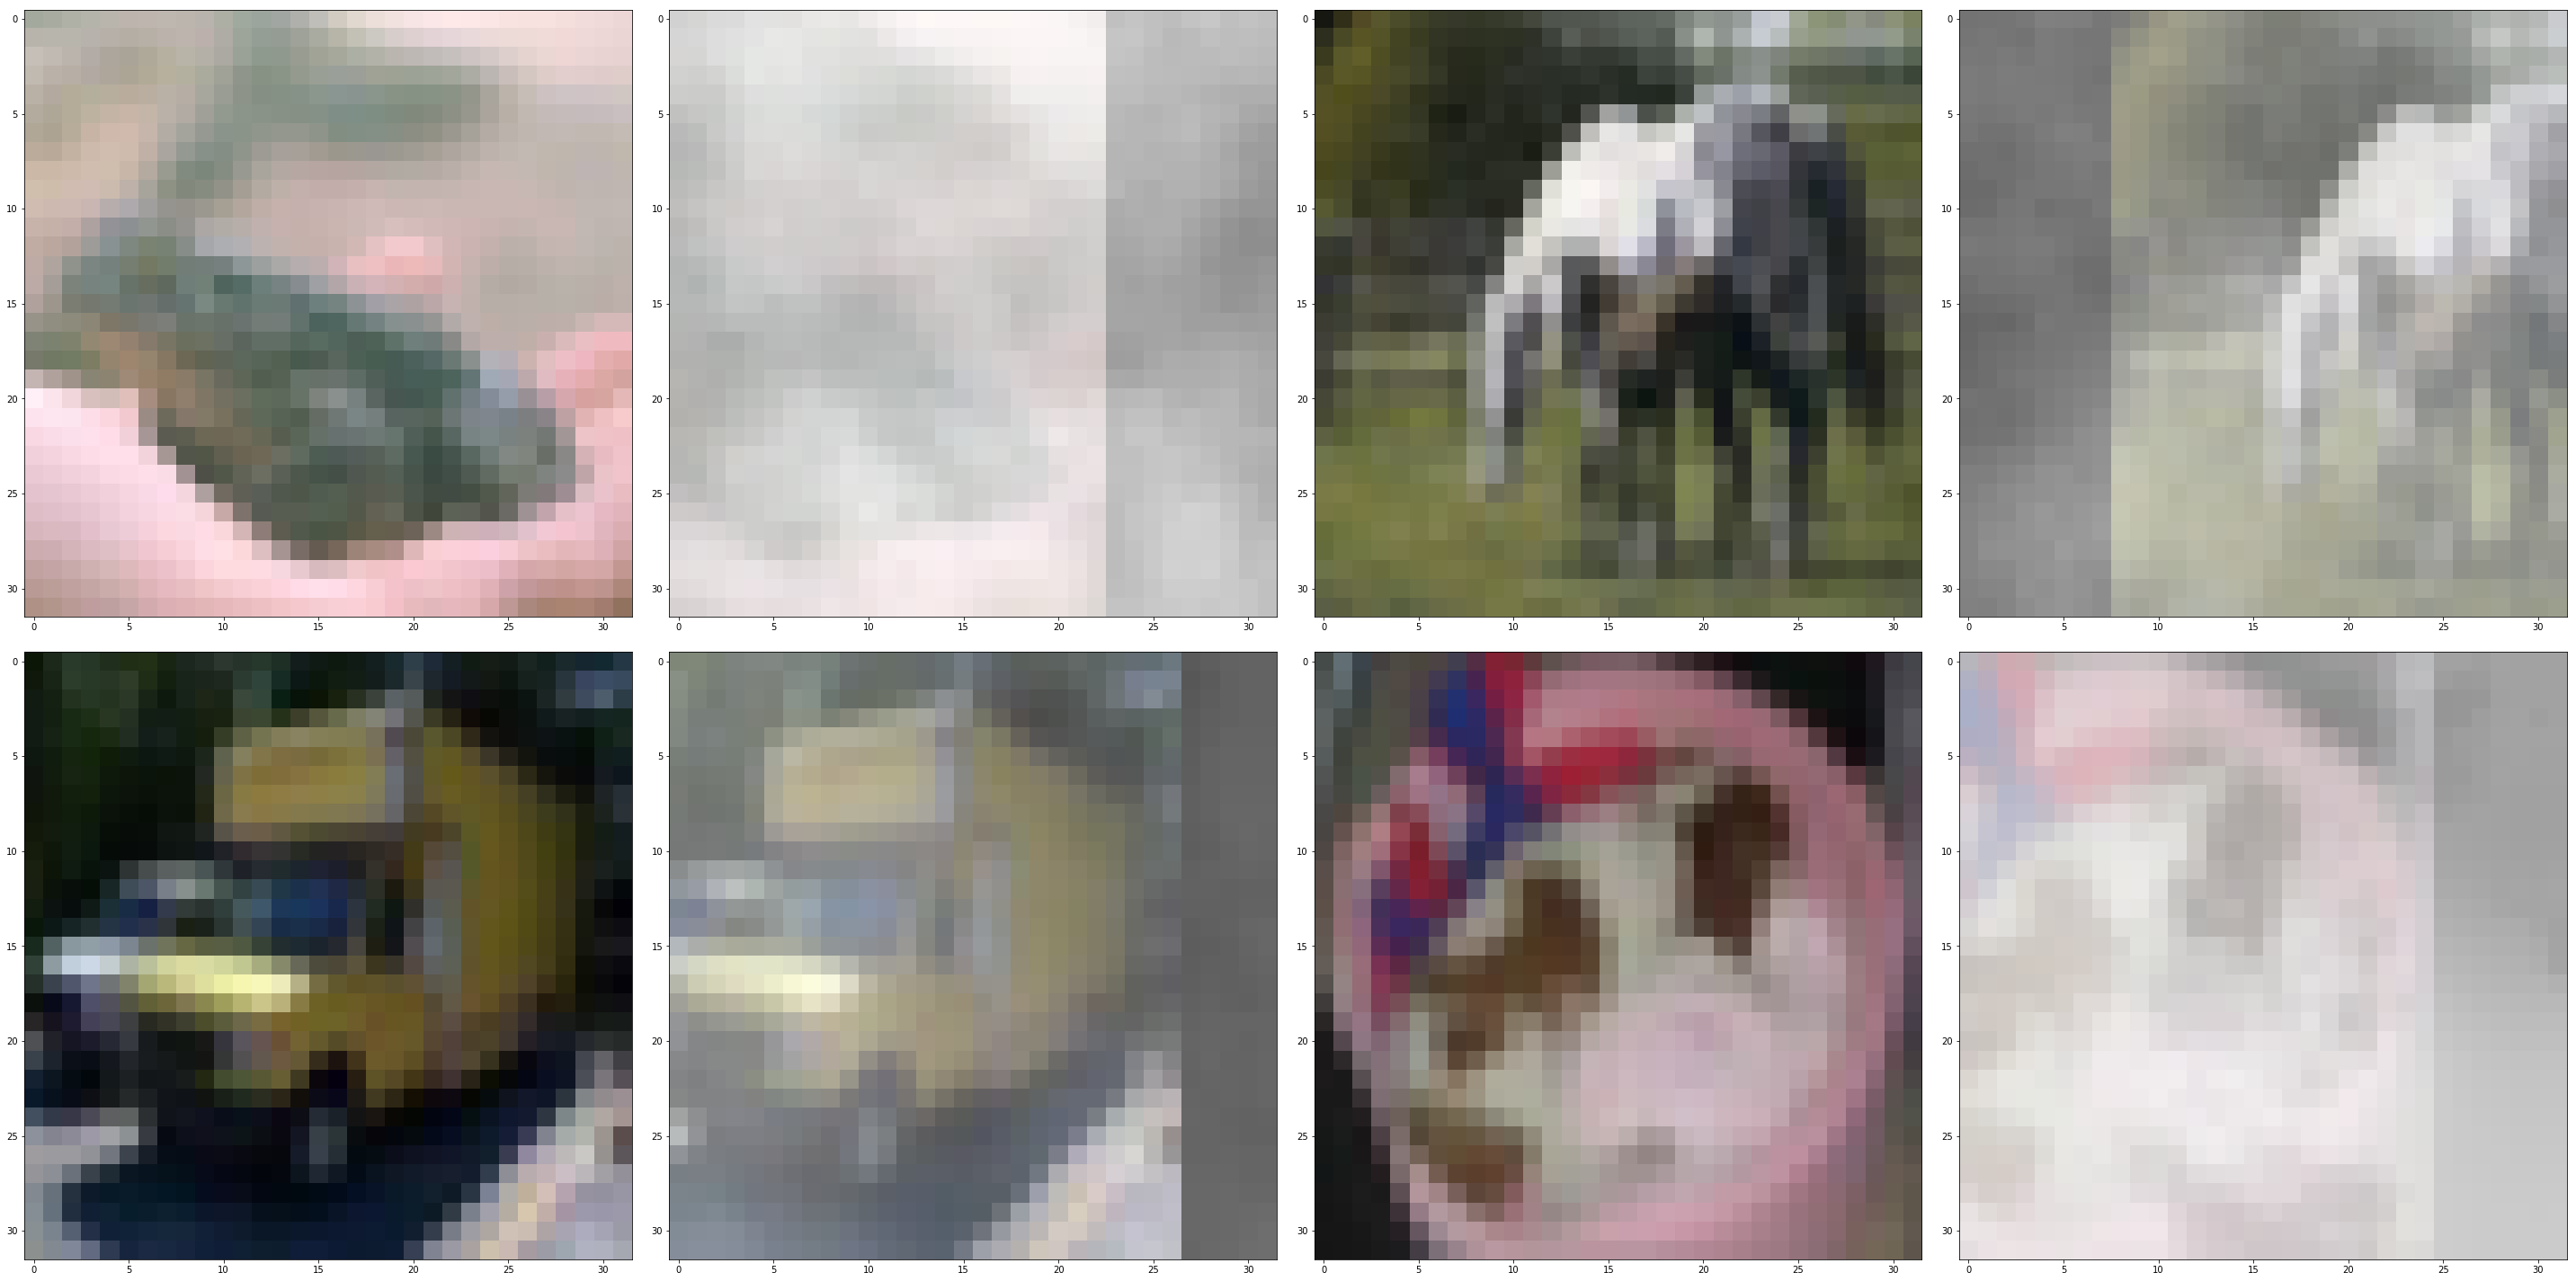

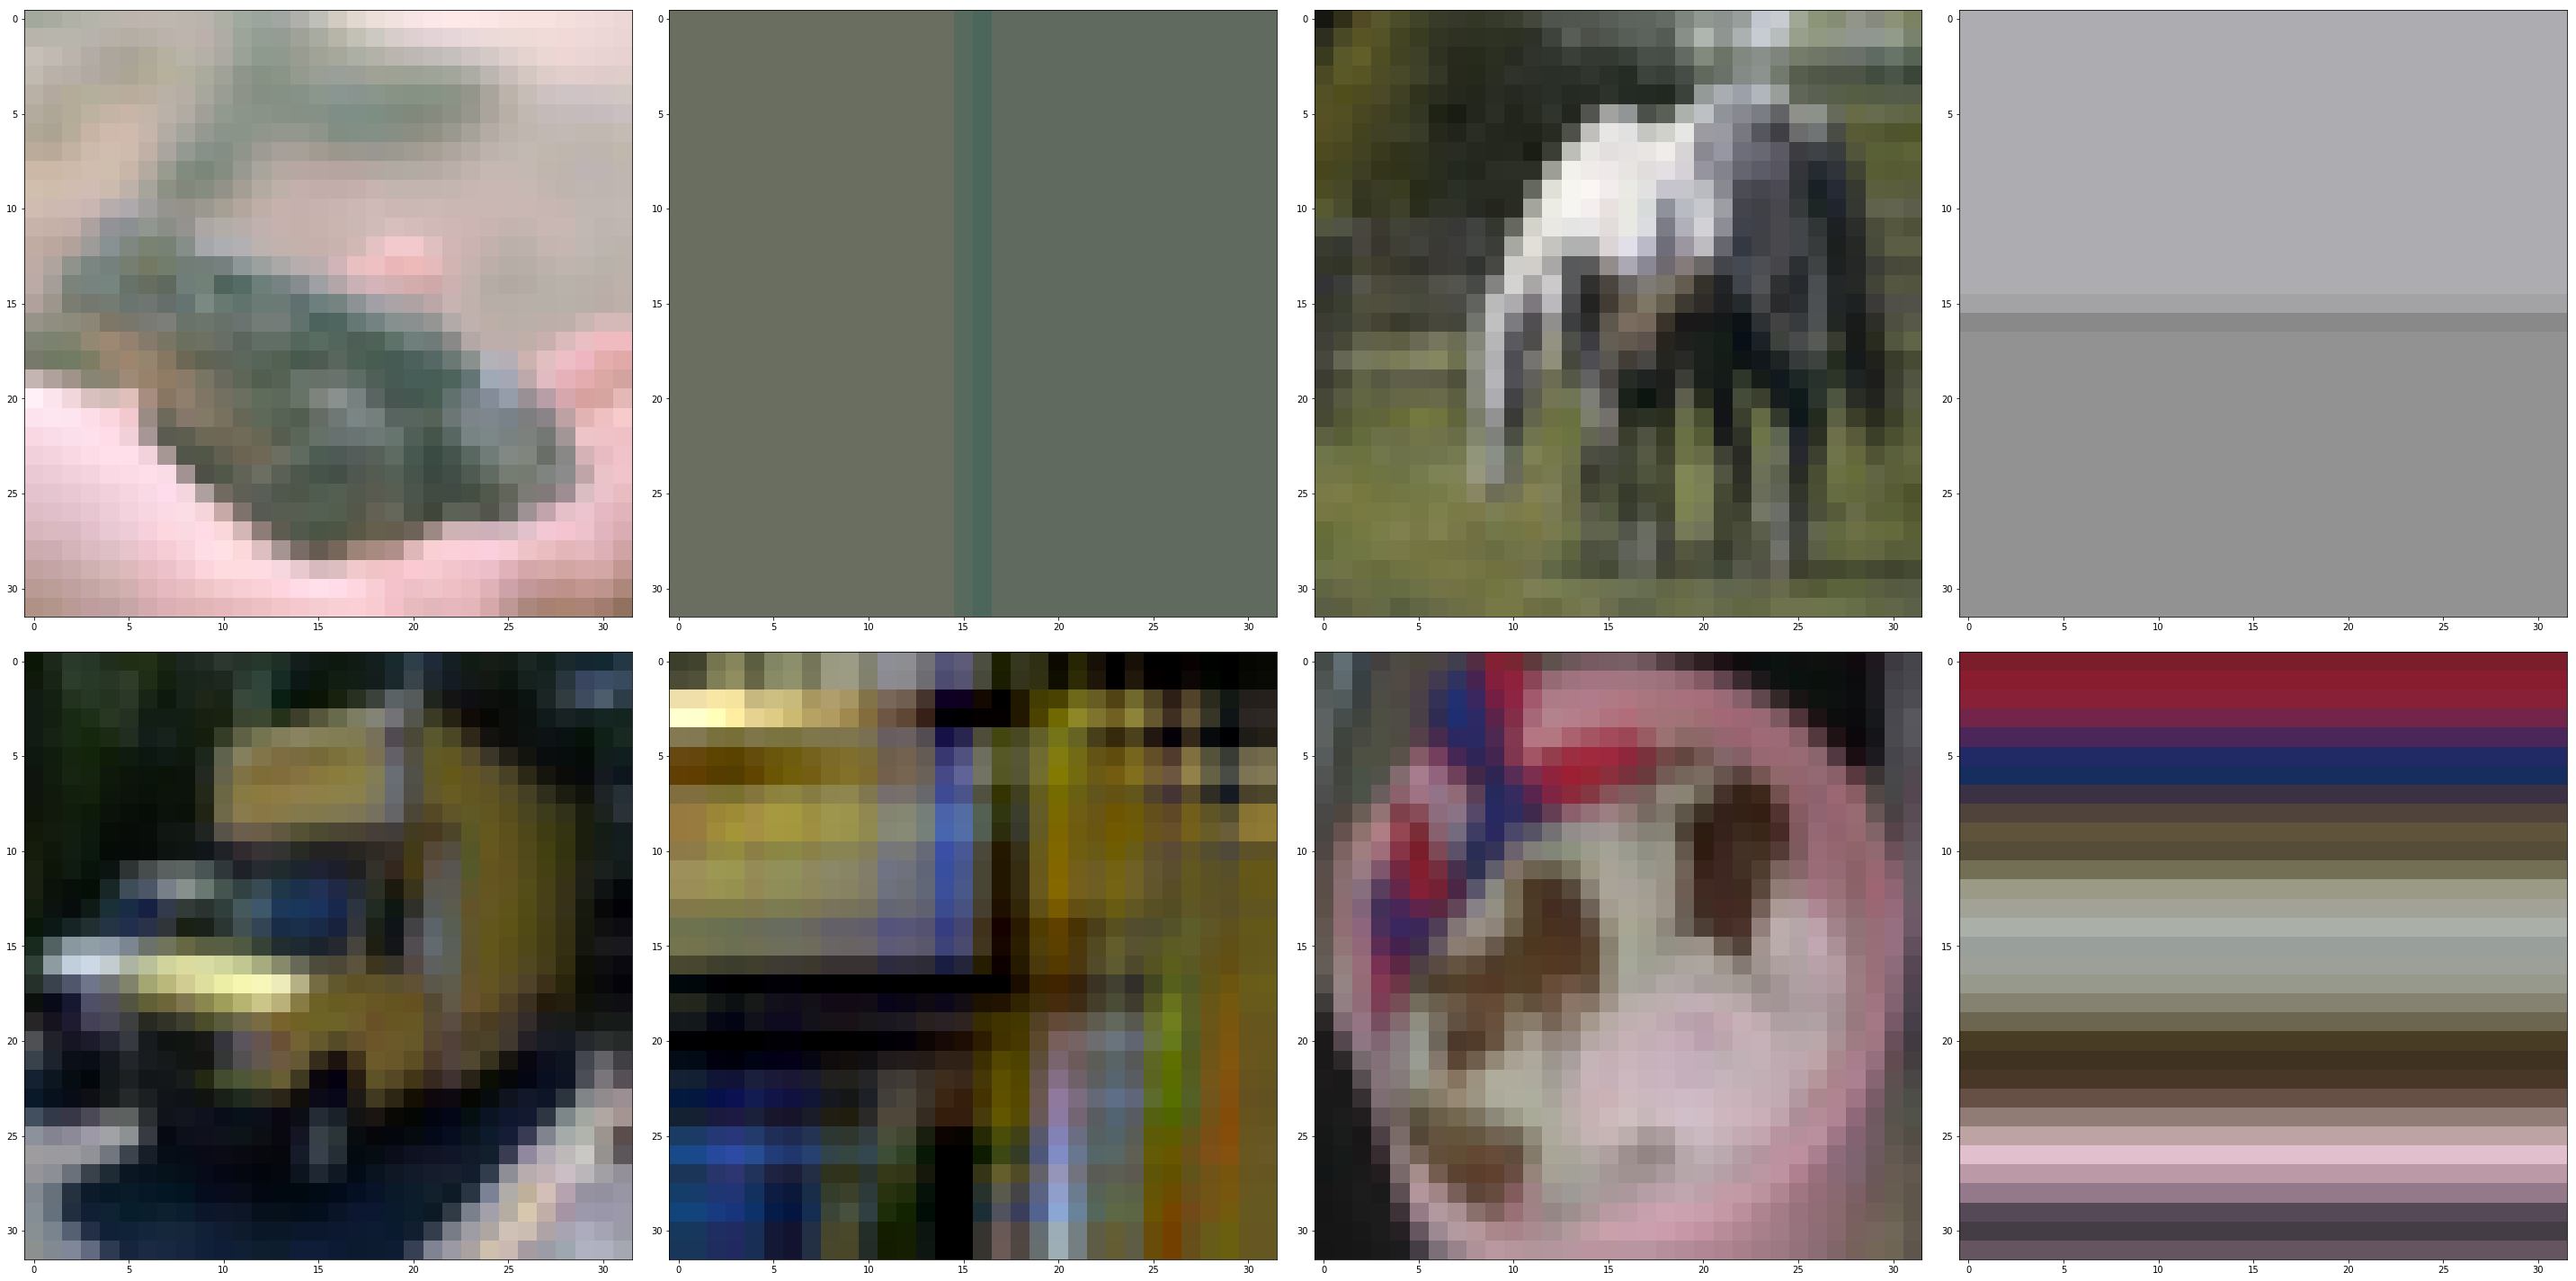

In [21]:
for i in top_policy_trial_no_arr:
    print (i)
    display_augmentation_by_trial_no(i, exp_df, data)

# Non-overfitting augmentations

In [22]:
acc_overfit_by_trial = exp_df[exp_df["epoch"]<20].groupby("trial_no").sum()["acc_overfit"]

# if acc_overfit is negative, that means validation is more accurate than training, so augmentation overfits
modified_exp_df = pd.merge(
    exp_df, 
    pd.DataFrame(acc_overfit_by_trial).reset_index().rename(columns={"acc_overfit":"total_acc_overfit"}),
    on="trial_no",
    how="left"
)

non_overfitting_exp_df = modified_exp_df[modified_exp_df["total_acc_overfit"]>0]

trial_no: 859
hyperparams: ['gaussian-blur', 1.0, 'brighten', 0.026000000000000002, 1.0]
trial_no: 481
hyperparams: ['add-to-hue-and-saturation', 0.098, 'shear', 0.527, 1.0]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


trial_no: 1091
hyperparams: ['horizontal-flip', 0.97, 'gamma-contrast', 0.875, 1.0]
trial_no: 309
hyperparams: ['gamma-contrast', 0.317, 'gaussian-blur', 0.8190000000000001, 1.0]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


trial_no: 1025
hyperparams: ['horizontal-flip', 0.9440000000000001, 'brighten', 0.207, 1.0]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


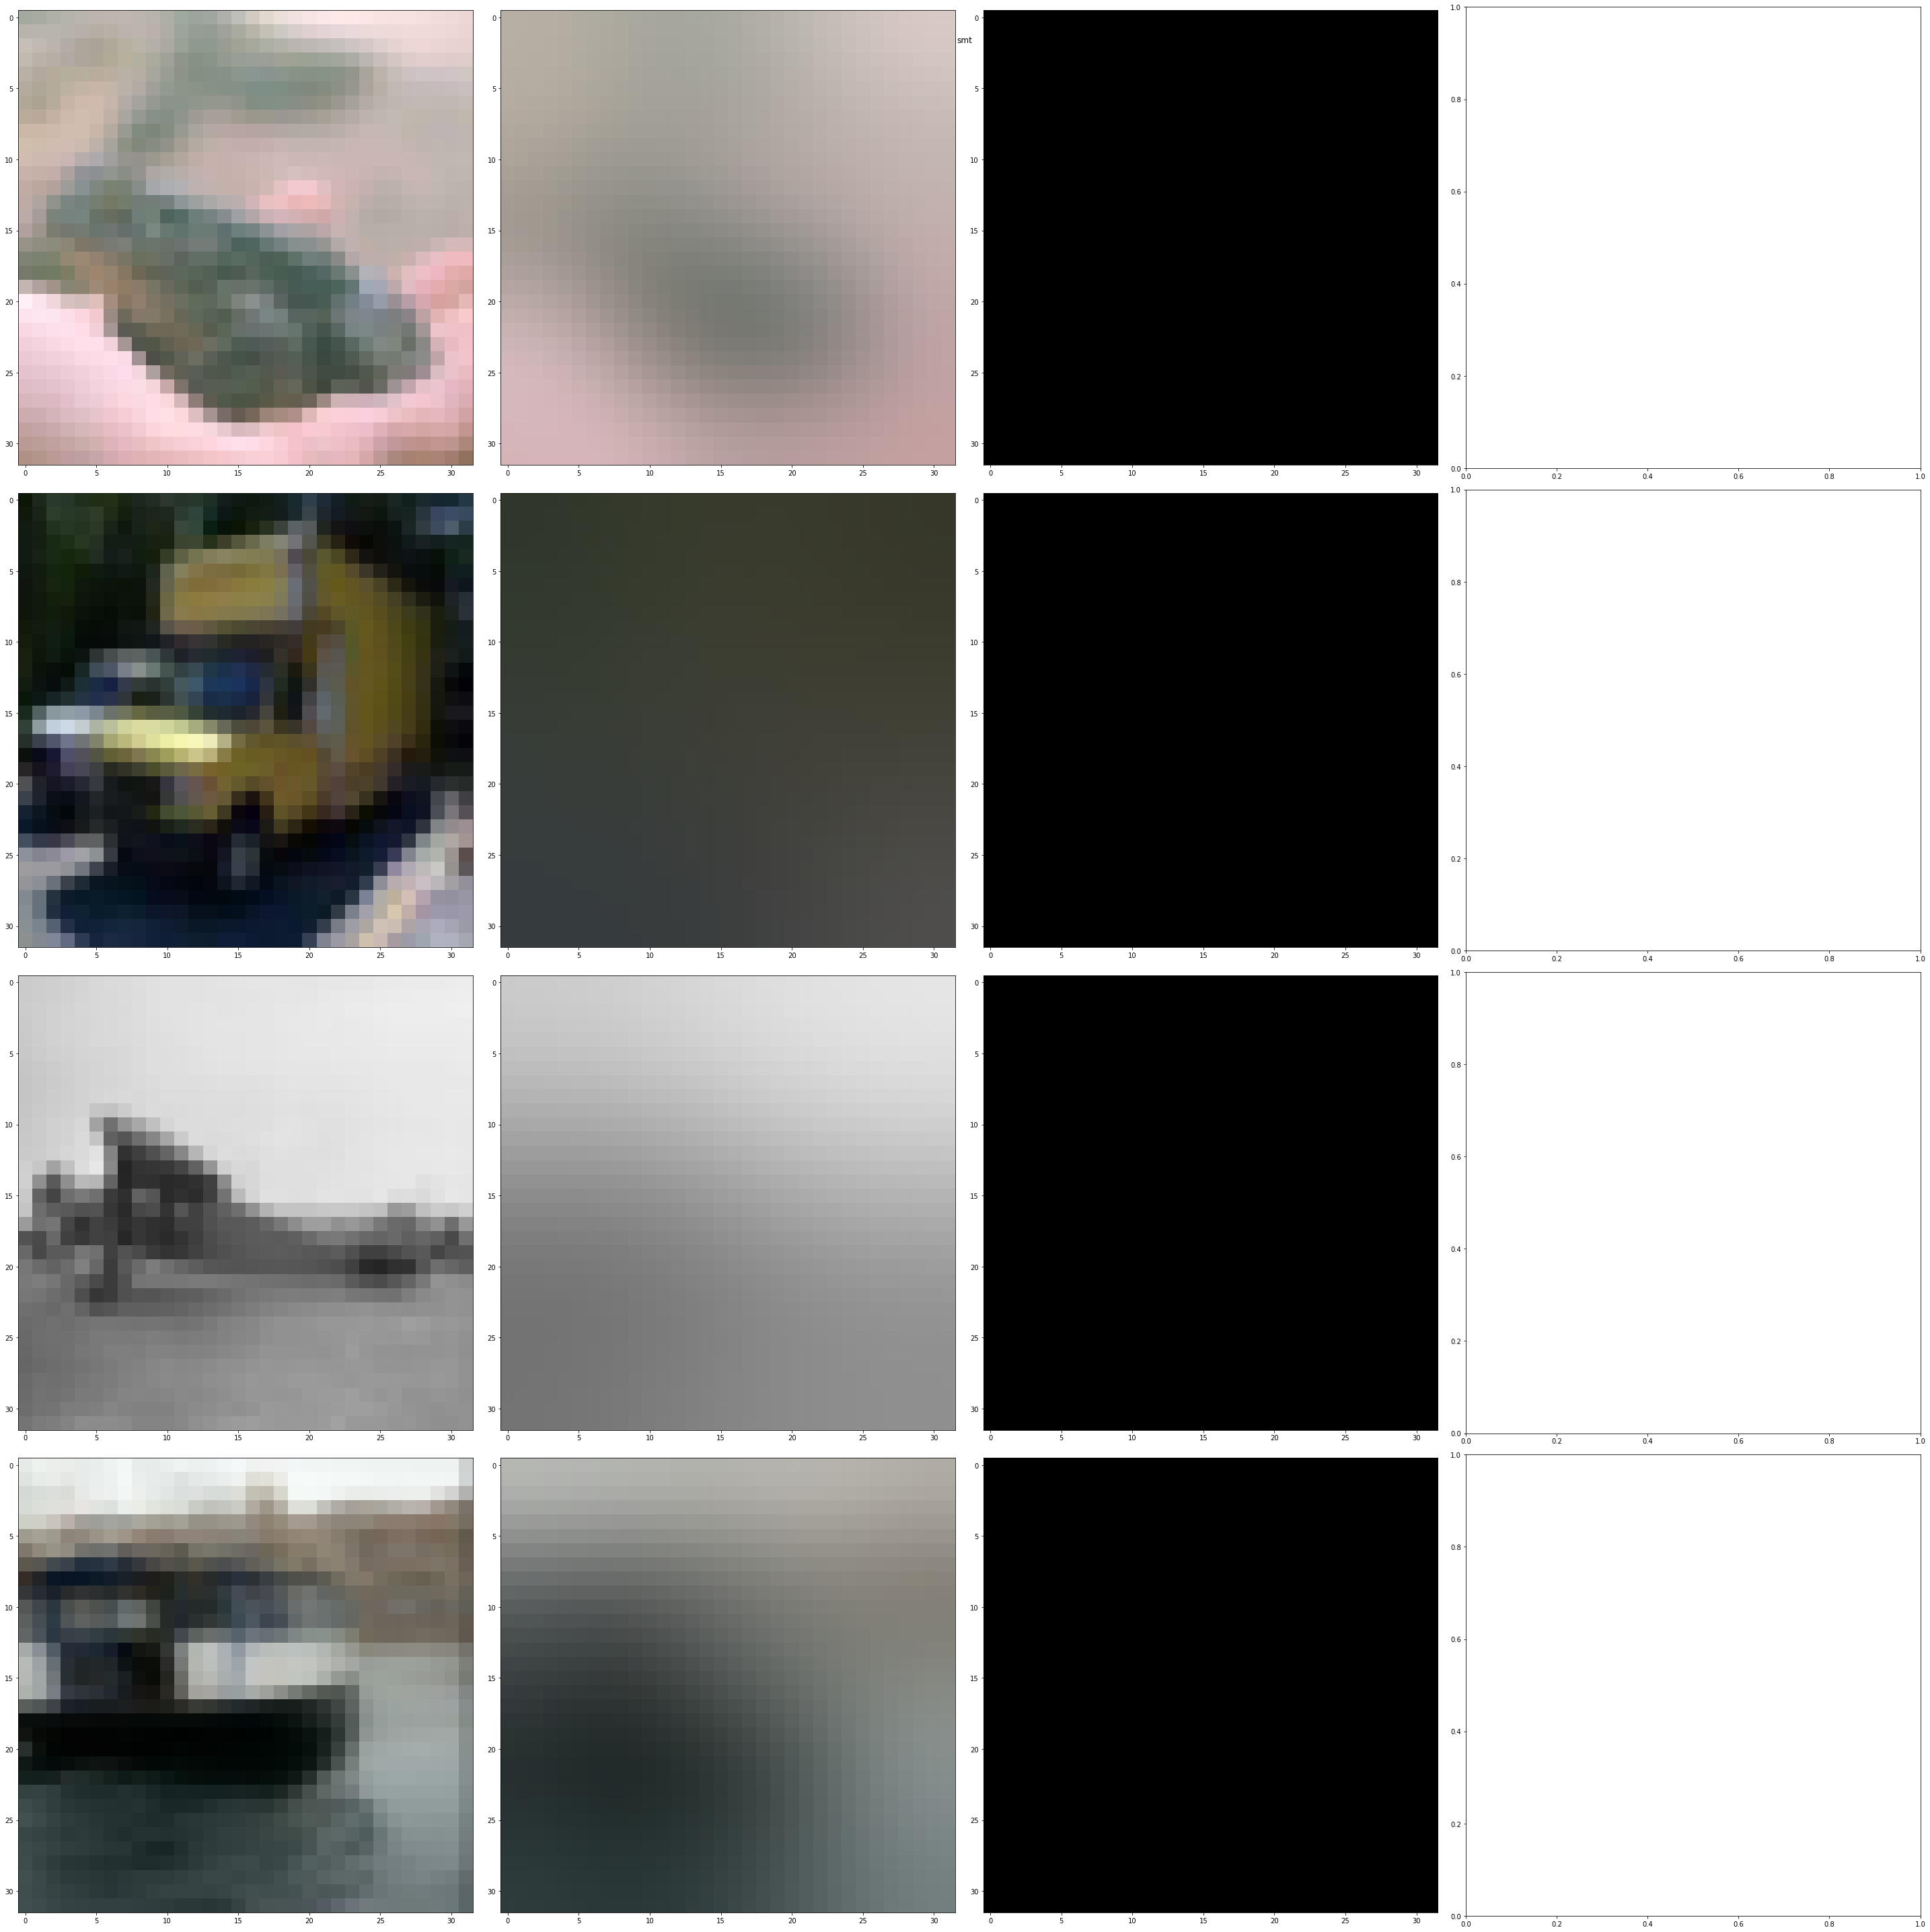

<Figure size 144x144 with 0 Axes>

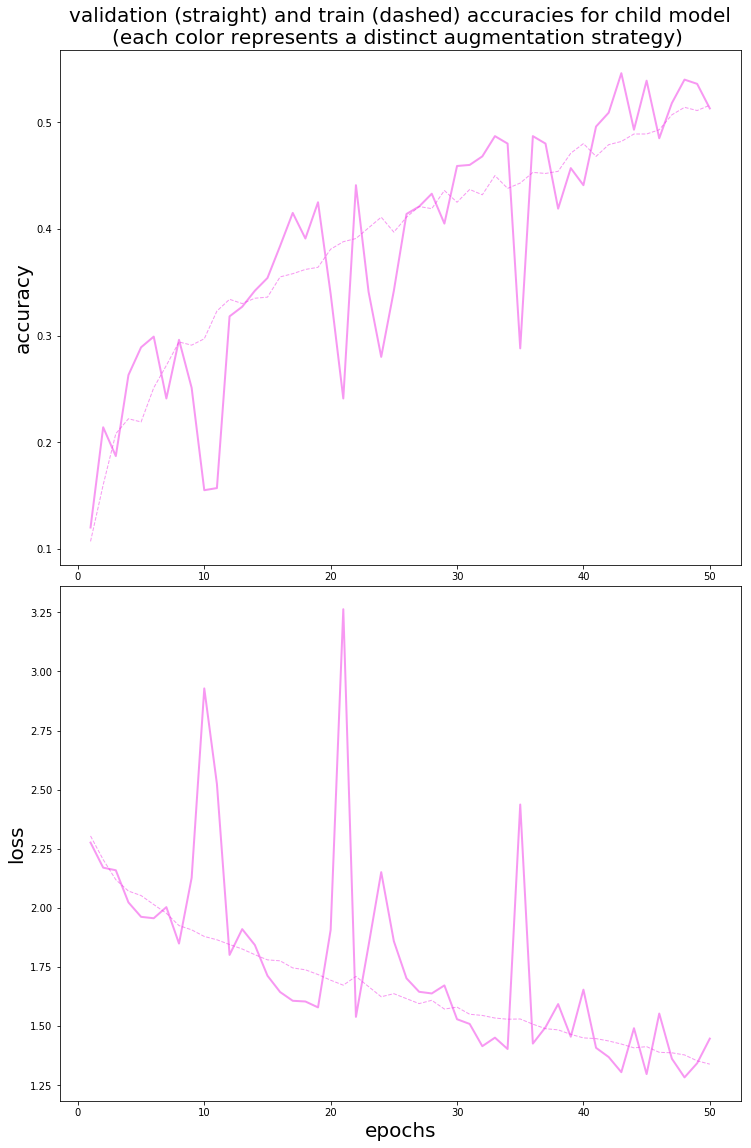

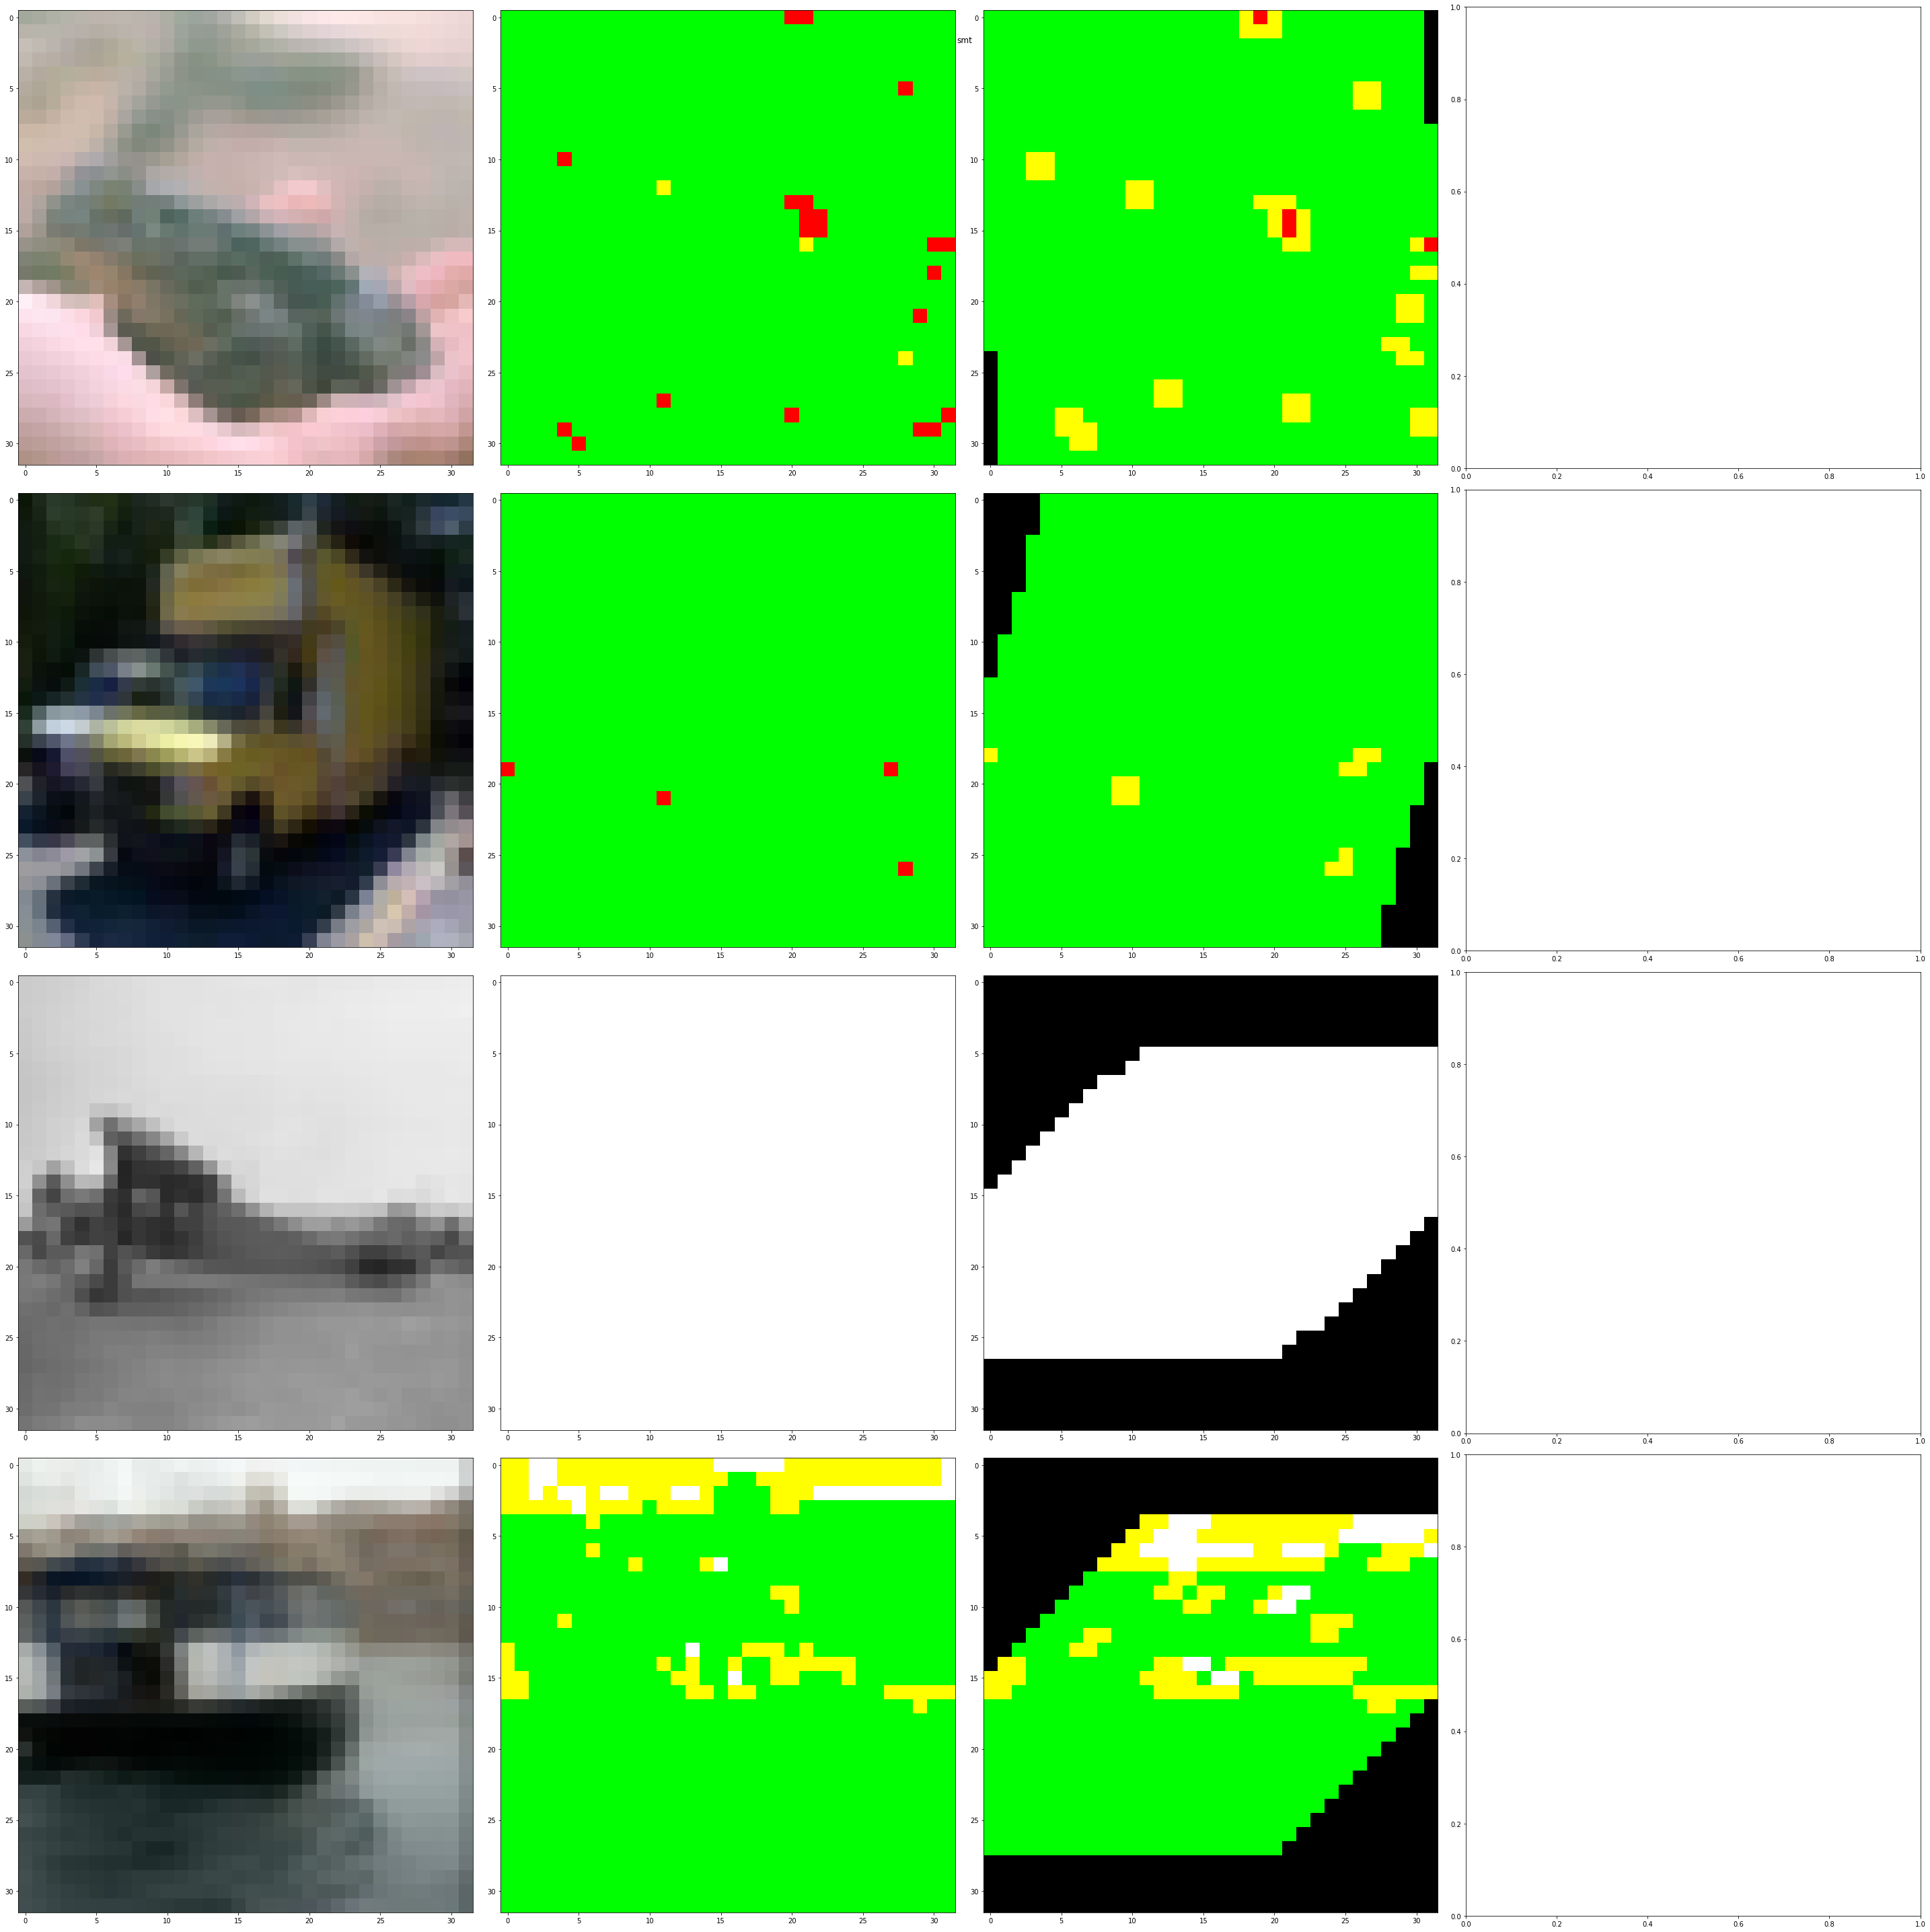

<Figure size 144x144 with 0 Axes>

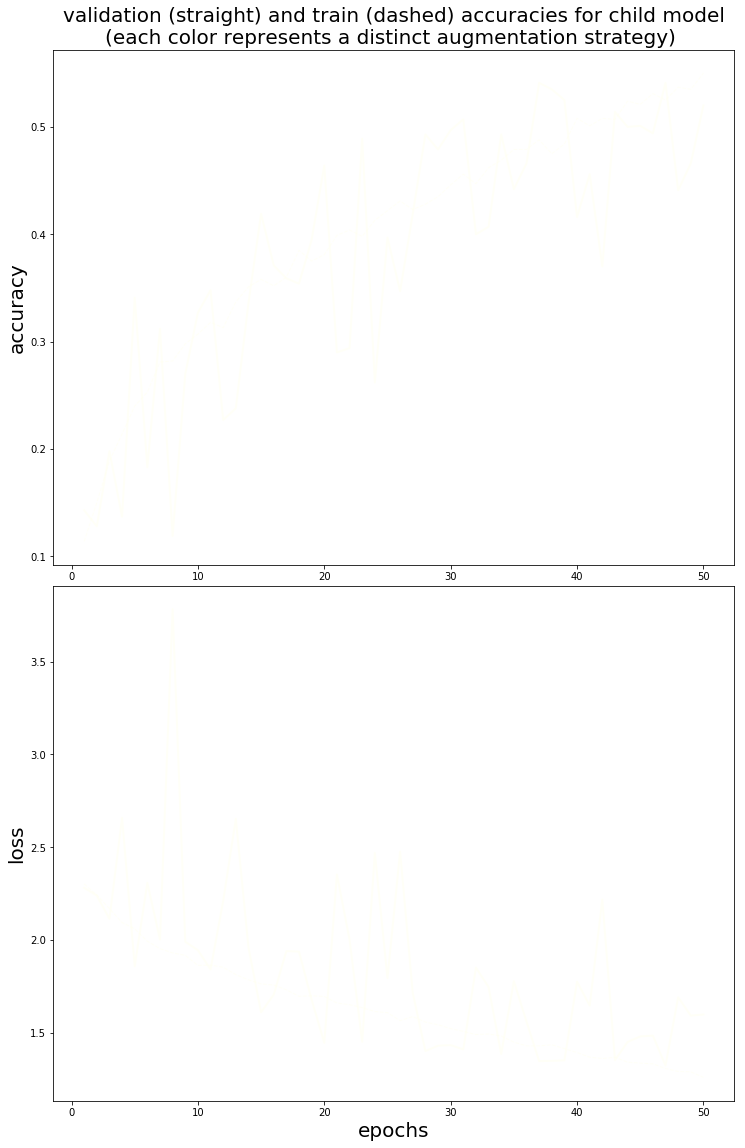

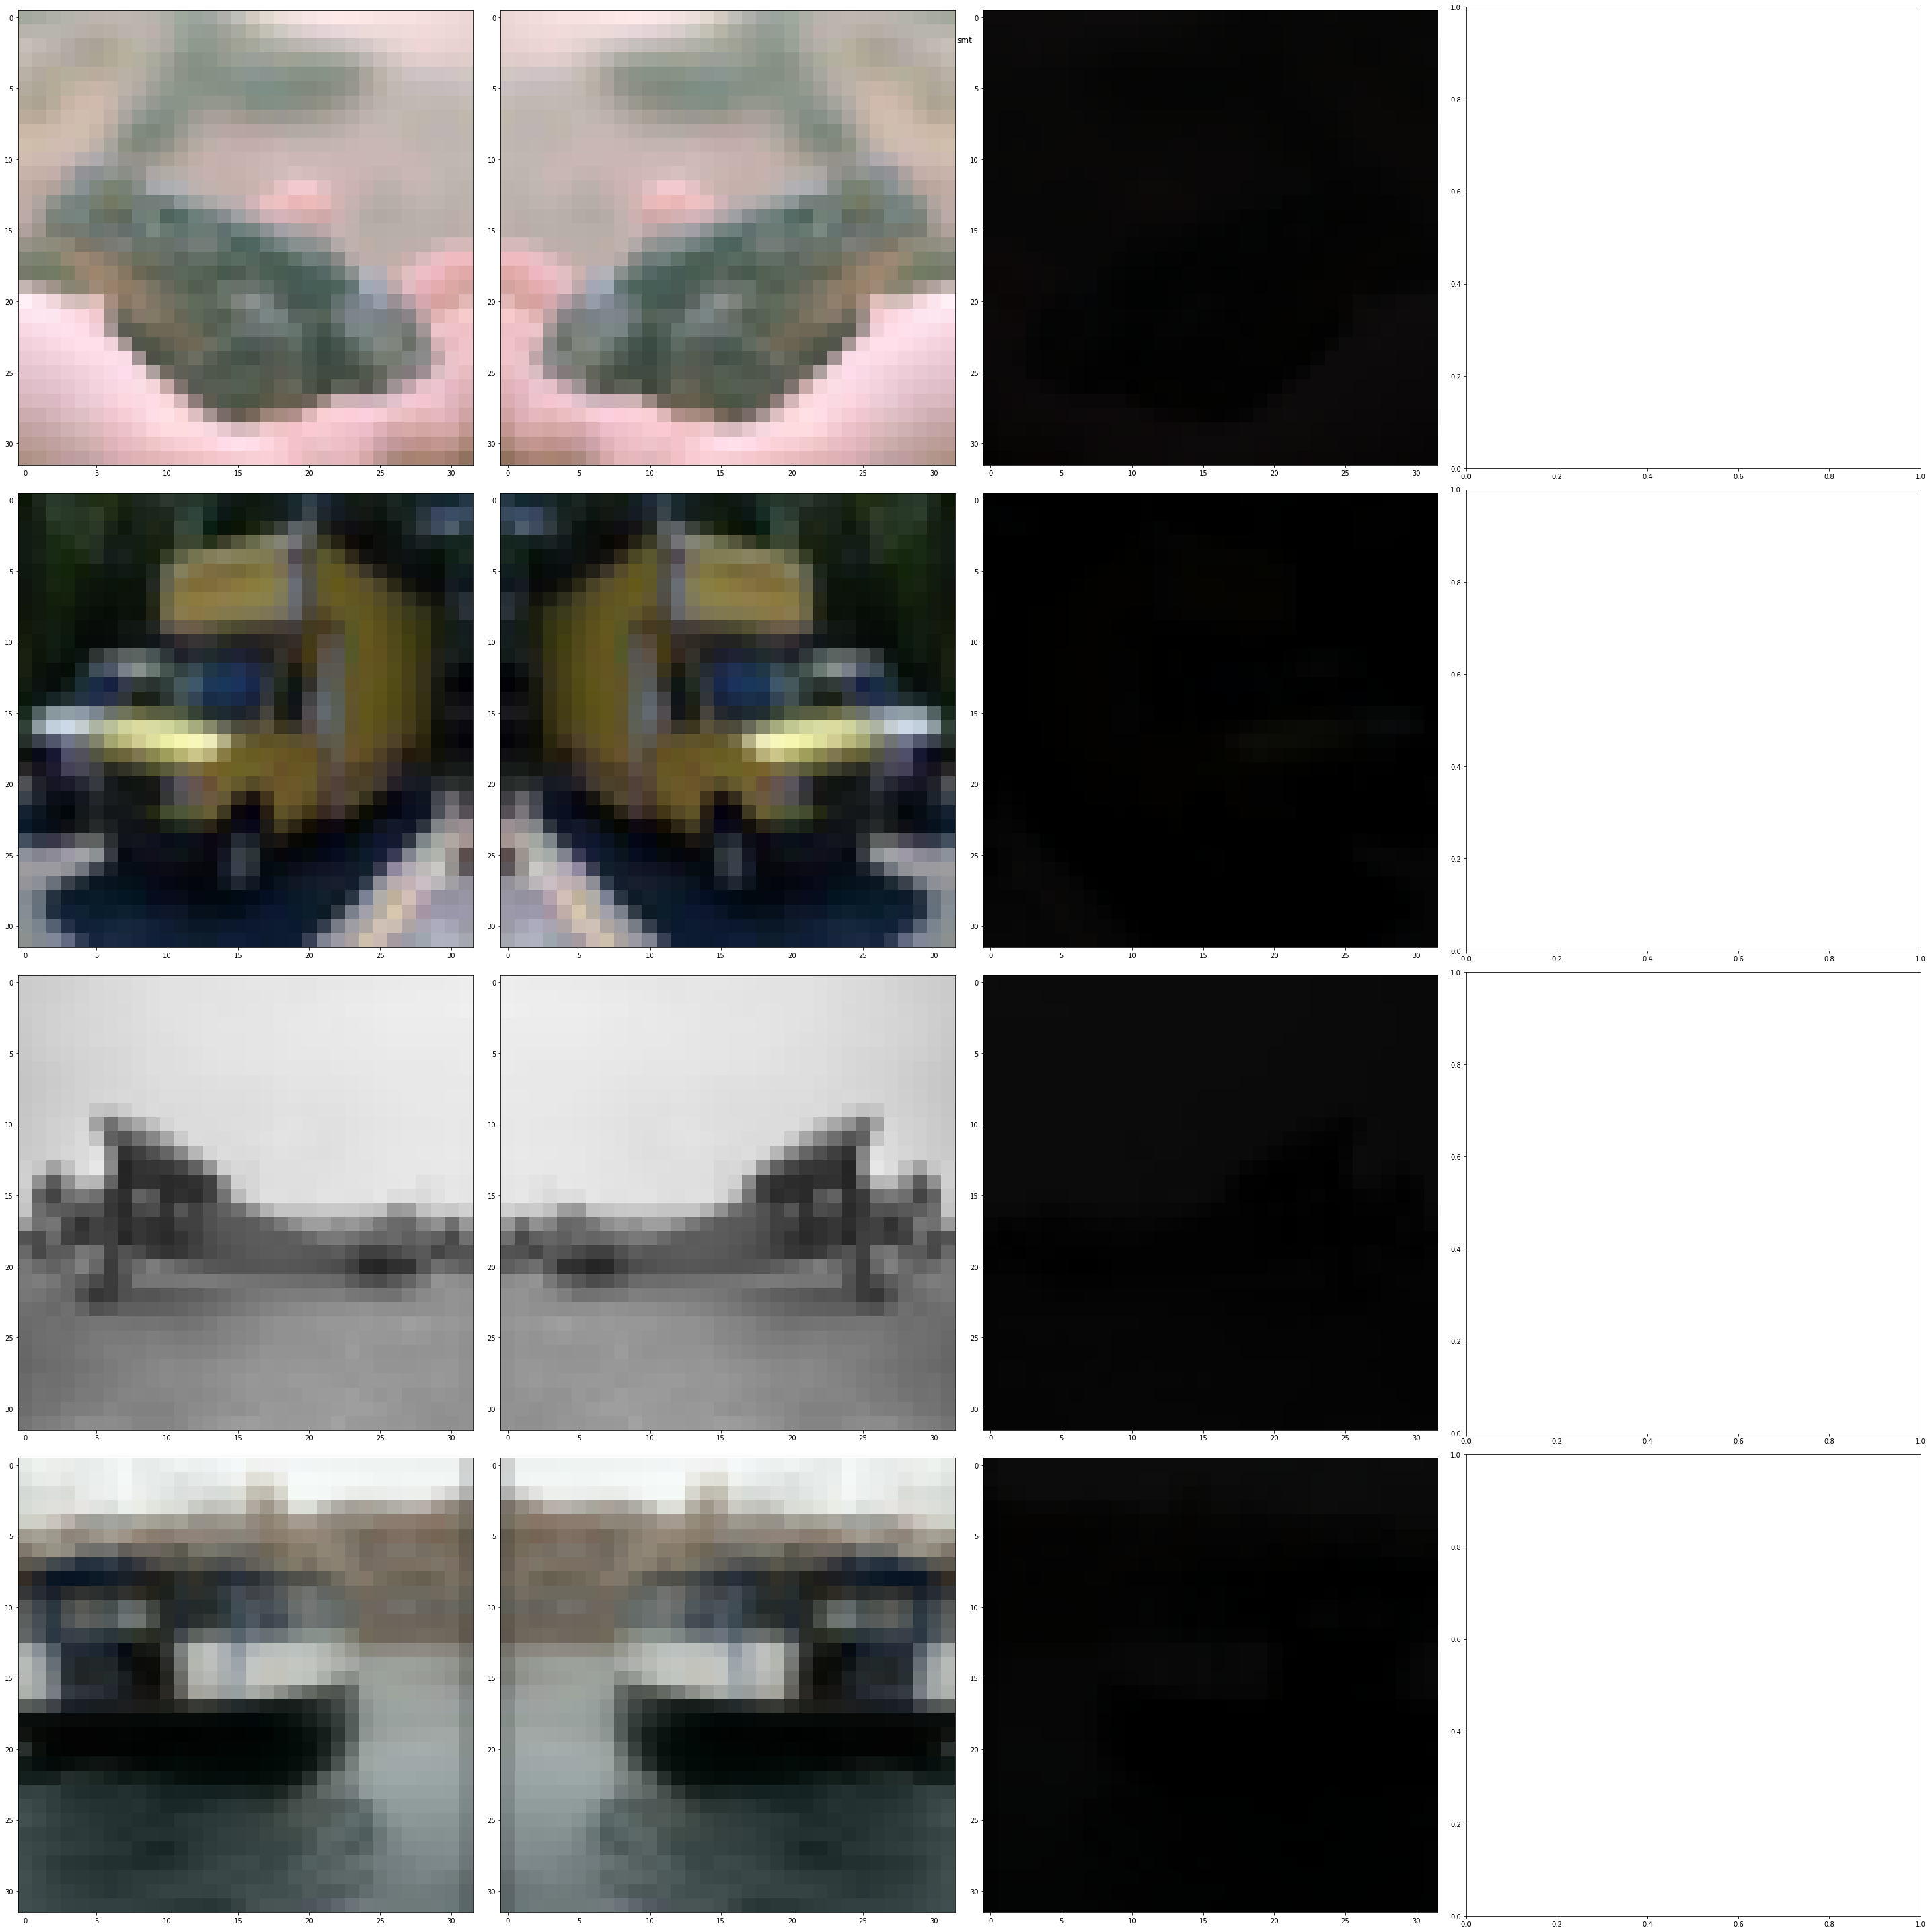

<Figure size 144x144 with 0 Axes>

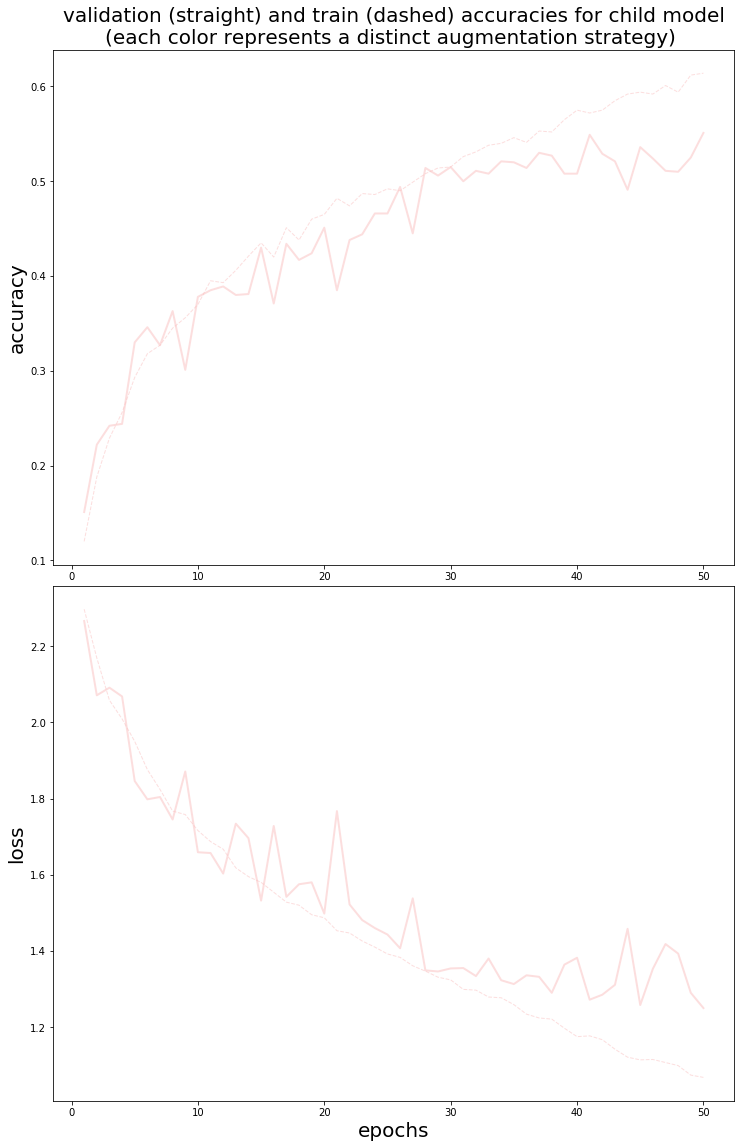

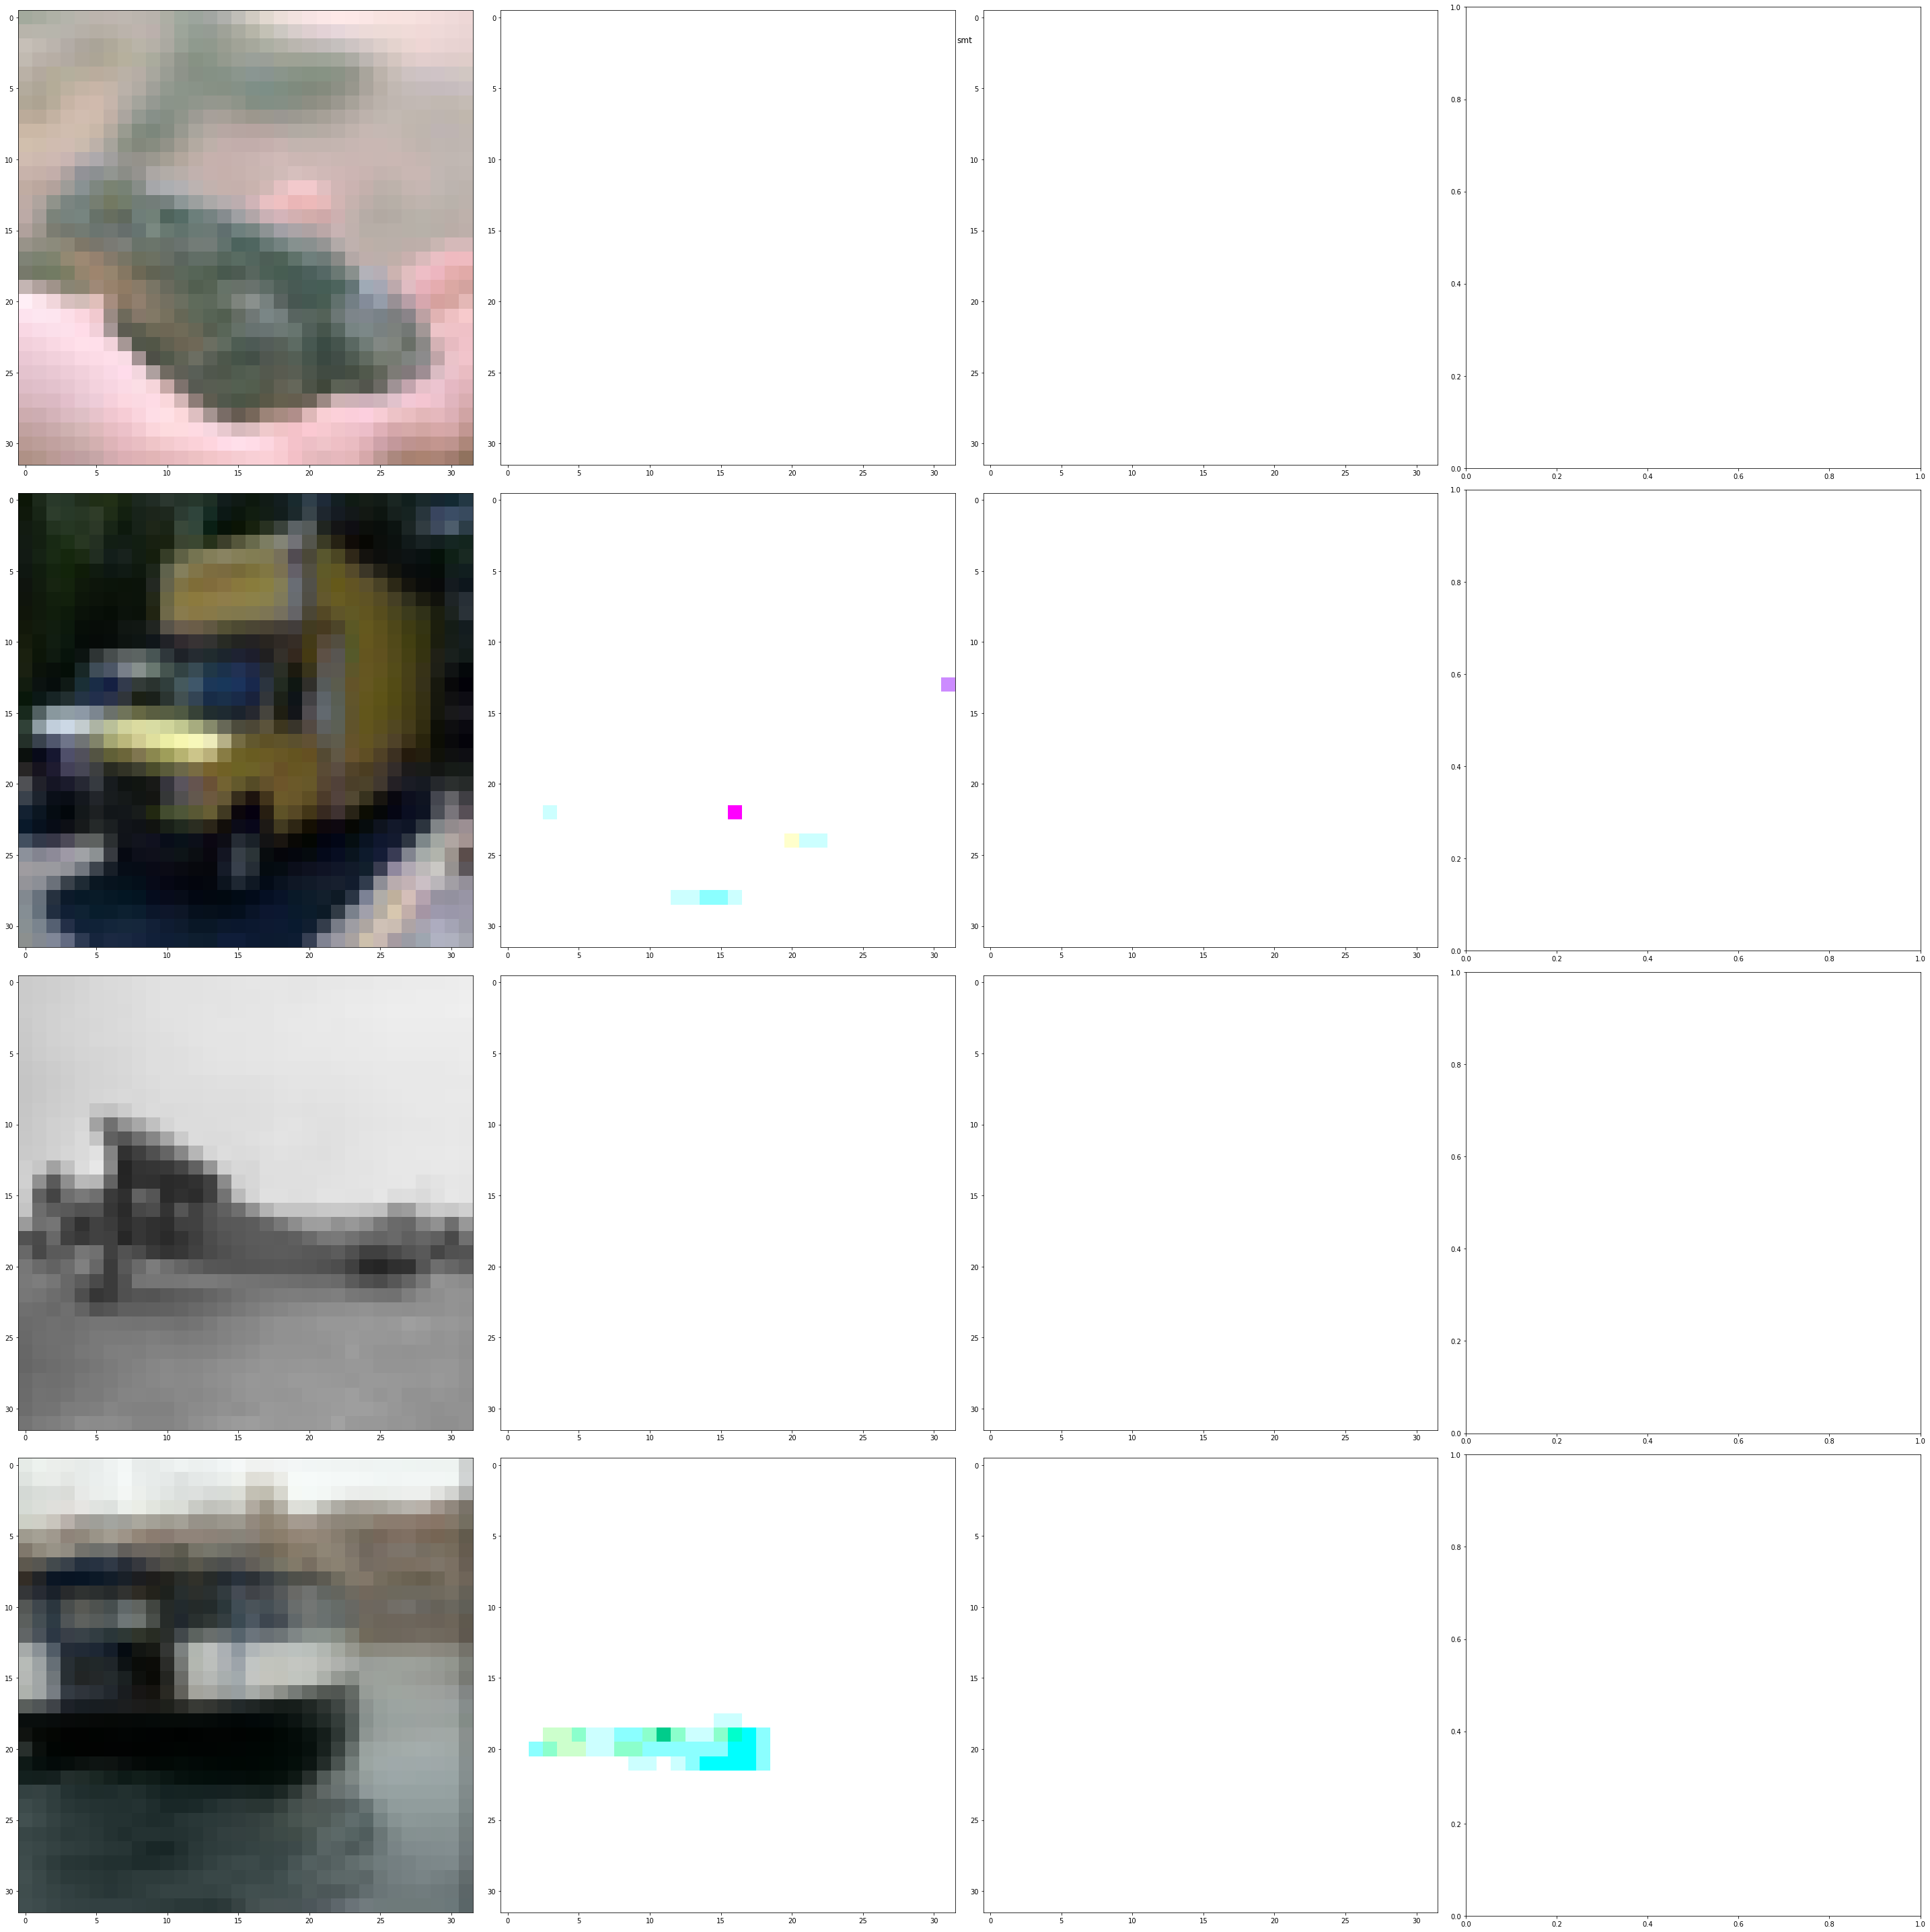

<Figure size 144x144 with 0 Axes>

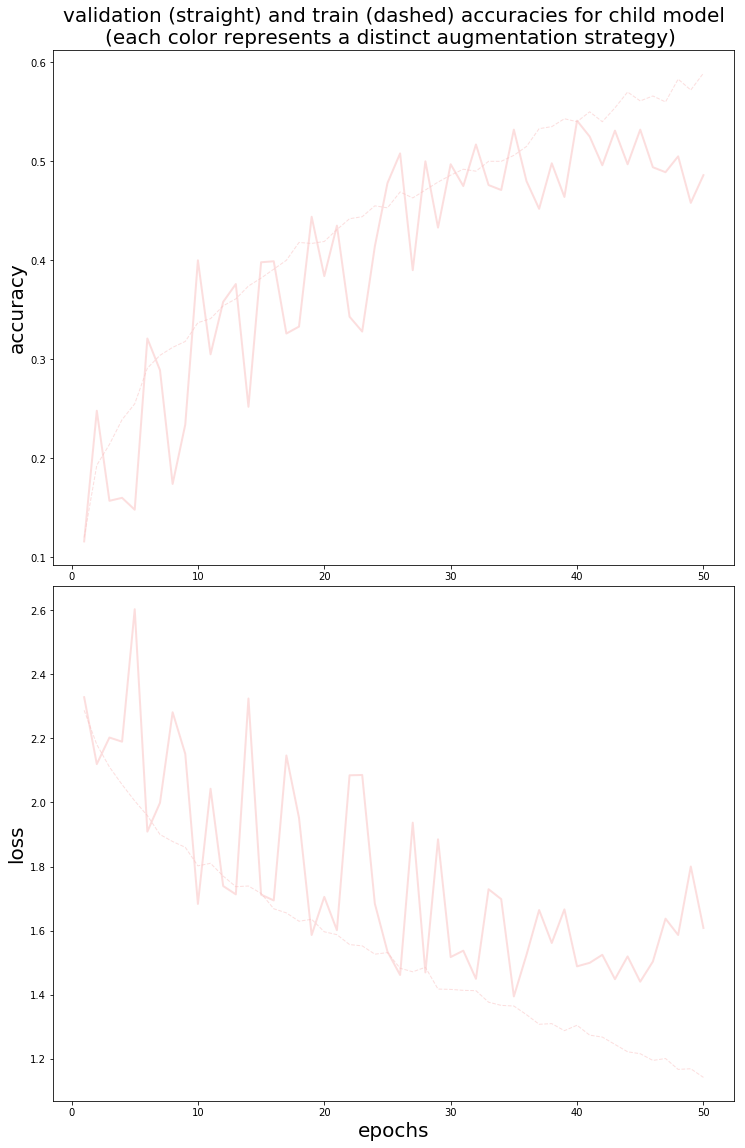

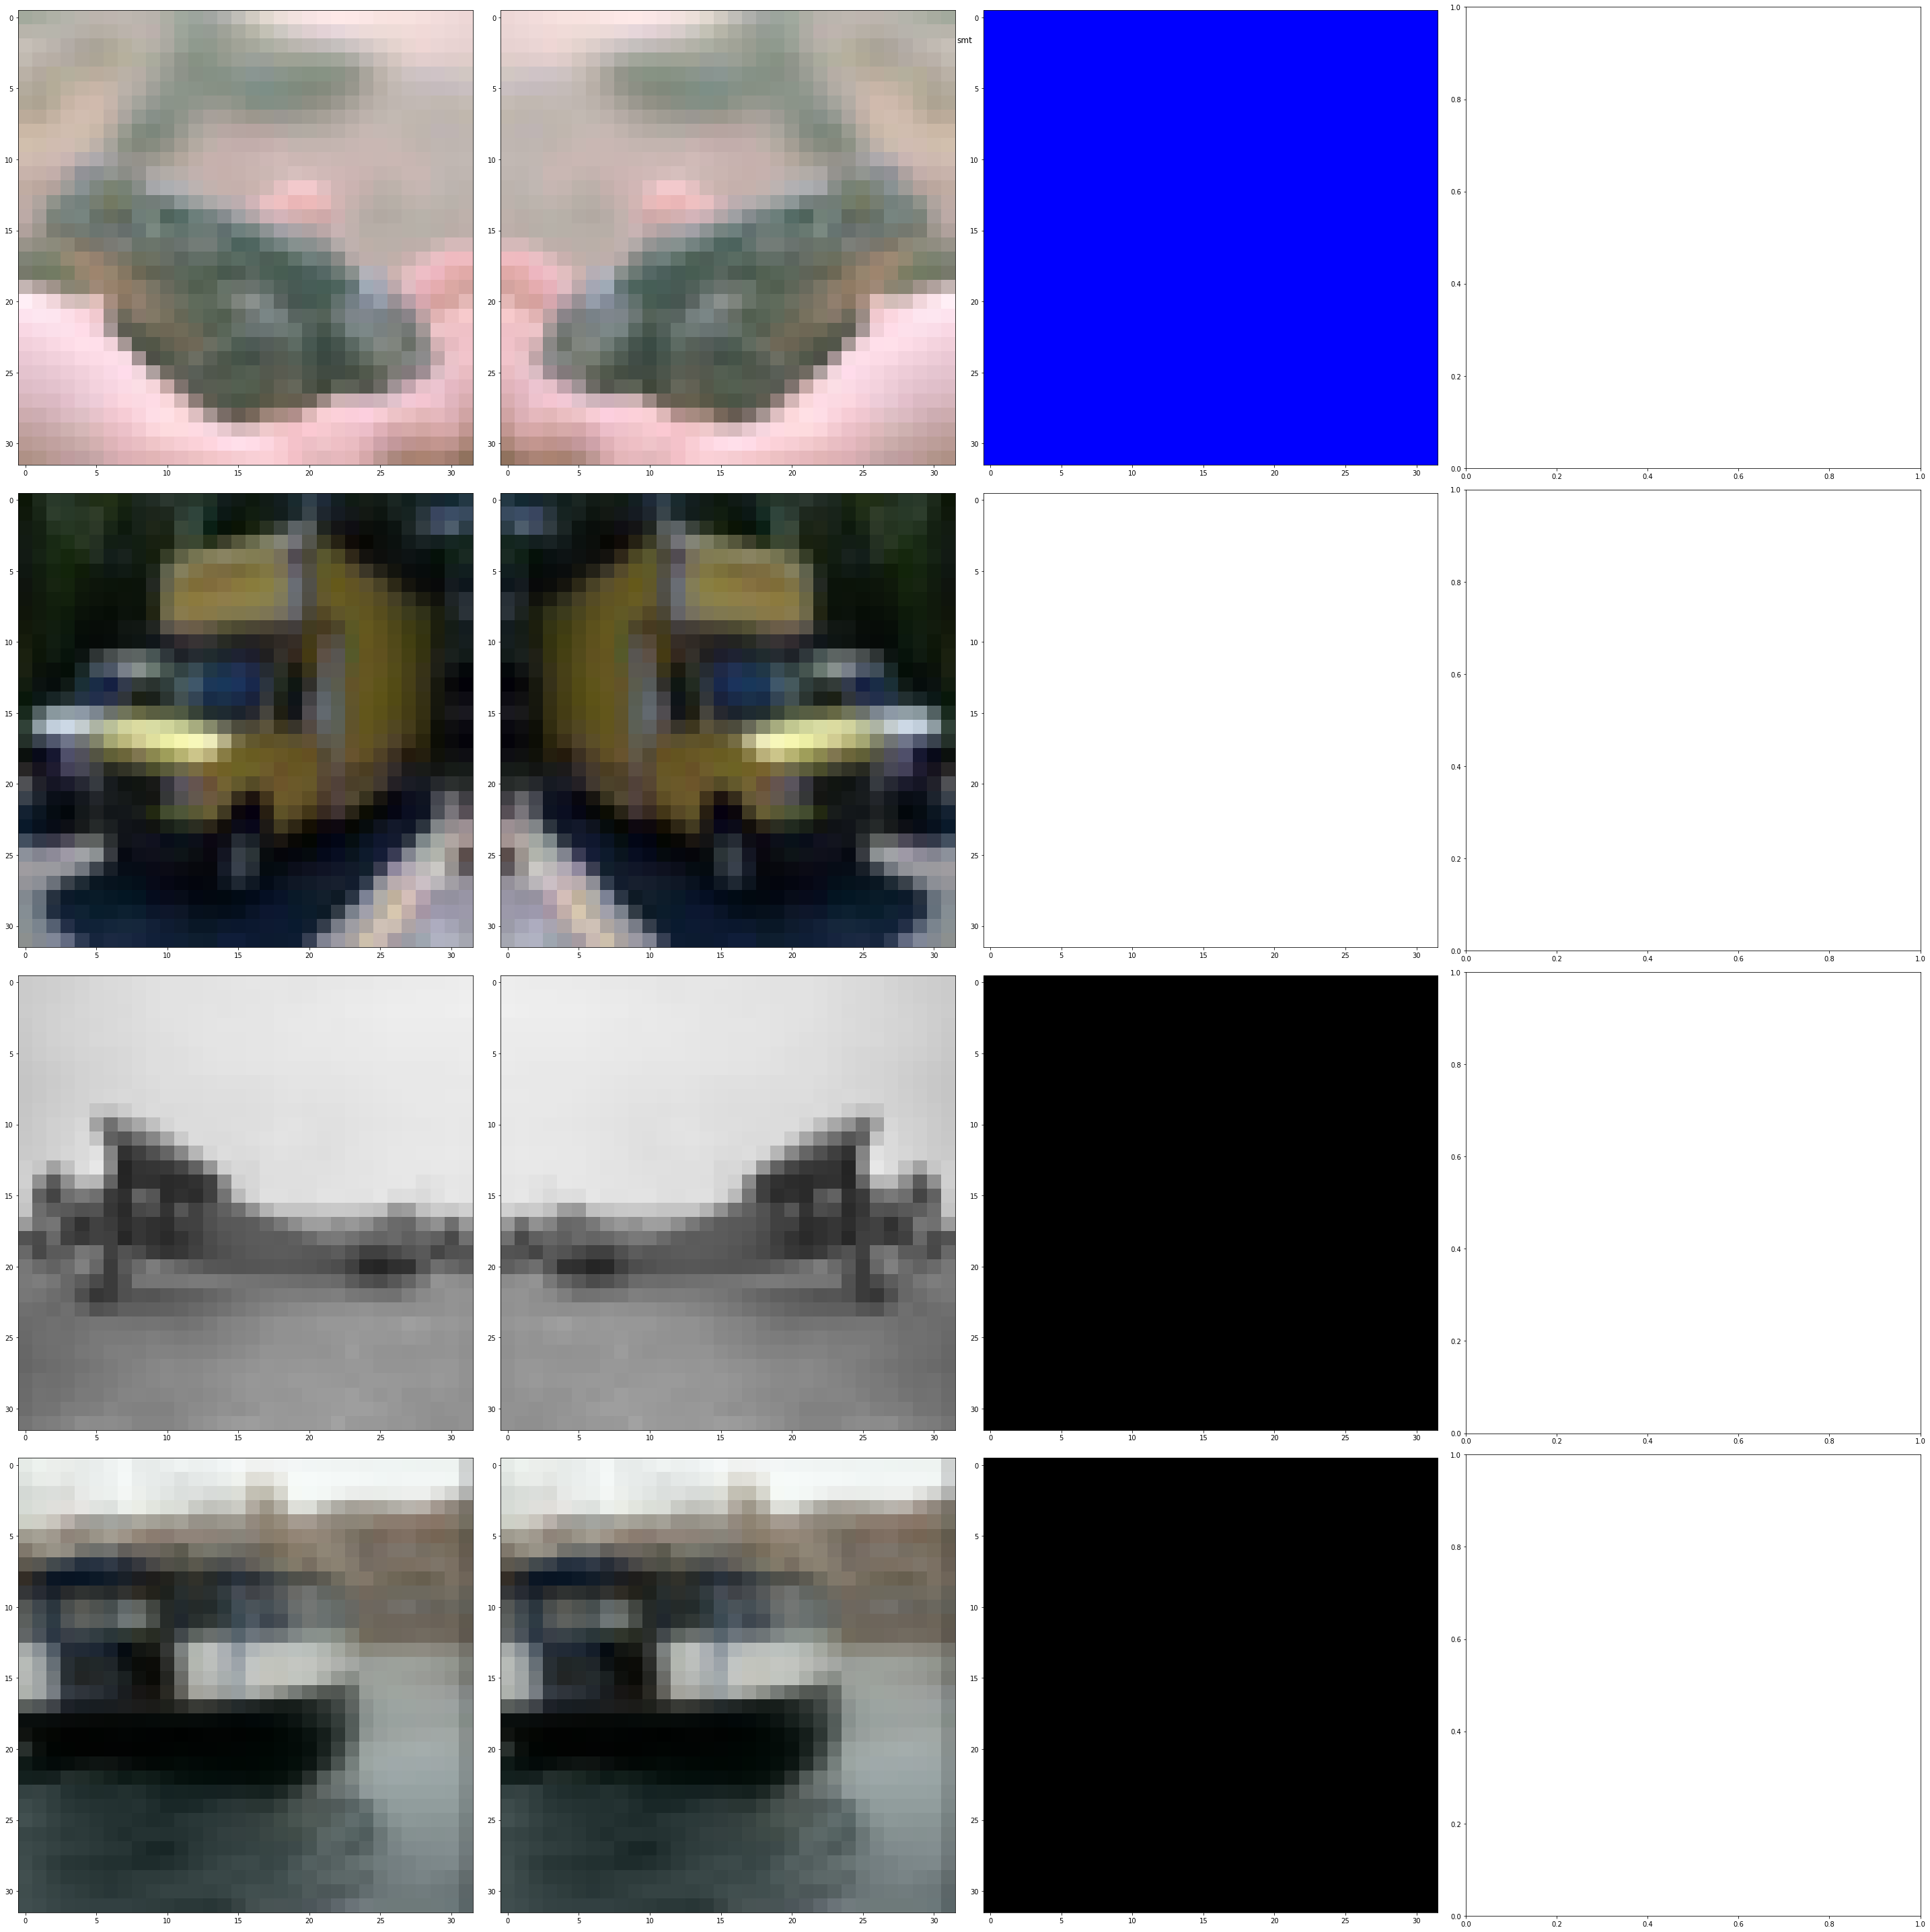

<Figure size 144x144 with 0 Axes>

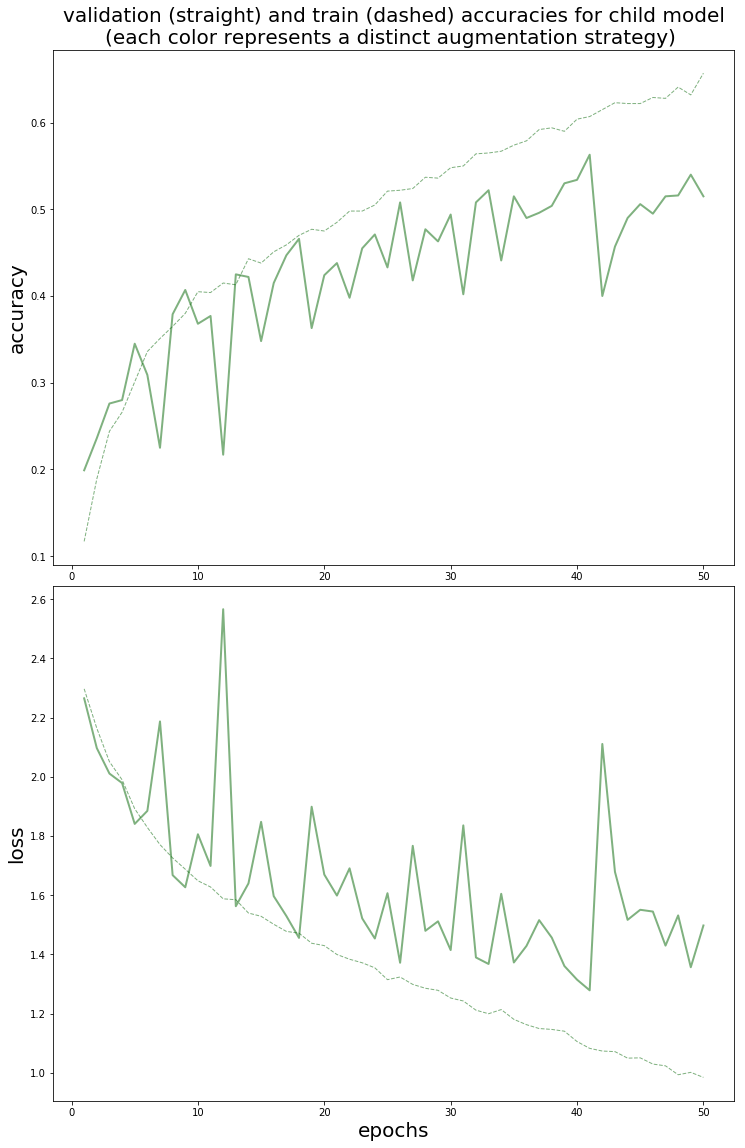

In [23]:
for i in non_overfitting_exp_df.drop_duplicates("trial_no").sort_values("reward", ascending=False).trial_no.values[:5]:
    print ("trial_no:",i)
    display_augmentation_by_steps(i, non_overfitting_exp_df, data, nrows=4)
    # display_augmentation_by_trial_no(i, non_overfitting_exp_df, data, nrows=2, ncols=4)
    plt.figure(figsize=(2,2))
    plot_exp_lines(exp_df[exp_df["trial_no"]==i])

In [24]:
top20_df = (exp_df.drop_duplicates("trial_no")
    .sort_values("reward",ascending=False)
    .drop_duplicates(["aug1_type","aug2_type"]))[:20]

top20_df.to_csv(f"../../top20_policies_cifar10_exp_{EXP_NO}.csv", index=False)


top20_df

,acc,loss,val_acc,val_loss,trial_no,aug1_type,aug1_magnitude,aug2_type,aug2_magnitude,portion,sample_no,reward,epoch,acc_overfit
54300,0.117,2.291,0.232,2.242,1087,horizontal-flip,0.903,gamma-contrast,0.870,0.929,1,0.573,0.0,-0.115
2950,0.108,2.302,0.150,2.299,60,crop,0.897,invert,0.024,0.619,1,0.564,0.0,-0.042
24950,0.105,2.302,0.156,2.279,500,translate-x,0.334,fog,0.462,0.462,1,0.561,0.0,-0.051
3050,0.128,2.278,0.110,2.272,62,crop,0.881,emboss,0.060,0.498,1,0.559,0.0,0.018
18450,0.106,2.296,0.150,2.254,370,add-to-hue-and-saturation,0.478,shear,0.195,0.900,1,0.558,0.0,-0.044
50350,0.111,2.298,0.184,2.272,1008,vertical-flip,0.654,shear,0.207,0.916,1,0.558,0.0,-0.073
33450,0.115,2.296,0.211,2.265,670,horizontal-flip,0.334,crop,0.299,0.440,1,0.558,0.0,-0.096
16500,0.118,2.299,0.185,2.266,331,add-to-hue-and-saturation,0.157,coarse-dropout,0.201,0.986,1,0.554,0.0,-0.067
2500,0.133,2.268,0.205,2.179,51,crop,0.858,translate-x,0.262,1.000,1,0.551,0.0,-0.072
7750,0.116,2.291,0.176,2.252,156,add-to-hue-and-saturation,0.047,vertical-flip,0.212,0.785,1,0.551,0.0,-0.060


In [54]:
demo_df = (top20_df.round(3)[:10]
    [["aug1_type", "aug1_magnitude", "aug2_type", "aug2_magnitude", "portion", "reward"]].
        rename(columns={"reward":"validation_accuracy(%)"}))

demo_df["validation_accuracy(%)"] = 100*demo_df["validation_accuracy(%)"]
demo_df["estimated_accuracy_boost(%)"] = demo_df["validation_accuracy(%)"] - 49

demo_df[["aug1_type", "aug1_magnitude", "aug2_type", "aug2_magnitude", "portion", "estimated_accuracy_boost(%)"]]

,aug1_type,aug1_magnitude,aug2_type,aug2_magnitude,portion,estimated_accuracy_boost(%)
54300,horizontal-flip,0.903,gamma-contrast,0.870,0.929,8.3
2950,crop,0.897,invert,0.024,0.619,7.4
24950,translate-x,0.334,fog,0.462,0.462,7.1
3050,crop,0.881,emboss,0.060,0.498,6.9
18450,add-to-hue-and-saturation,0.478,shear,0.195,0.900,6.8
50350,vertical-flip,0.654,shear,0.207,0.916,6.8
33450,horizontal-flip,0.334,crop,0.299,0.440,6.8
16500,add-to-hue-and-saturation,0.157,coarse-dropout,0.201,0.986,6.4
2500,crop,0.858,translate-x,0.262,1.000,6.1
7750,add-to-hue-and-saturation,0.047,vertical-flip,0.212,0.785,6.1


In [60]:
demo_df = (exp_df.round(3).sort_values("reward").drop_duplicates("trial_no")[4:0:-1]
    [["aug1_type", "aug1_magnitude", "aug2_type", "aug2_magnitude", "portion", "reward"]].
        rename(columns={"reward":"validation_accuracy(%)"}))

demo_df["validation_accuracy(%)"] = 100*demo_df["validation_accuracy(%)"]
demo_df["estimated_accuracy_boost(%)"] = demo_df["validation_accuracy(%)"] - 49

demo_df[["aug1_type", "aug1_magnitude", "aug2_type", "aug2_magnitude", "portion", "estimated_accuracy_boost(%)"]]

,aug1_type,aug1_magnitude,aug2_type,aug2_magnitude,portion,estimated_accuracy_boost(%)
16784,horizontal-flip,0.516,shear,0.207,0.921,-16.8
9802,brighten,0.295,shear,0.186,0.665,-17.1
9071,dropout,0.335,shear,0.051,0.569,-17.4
8249,shear,0.340,shear,0.207,0.665,-30.8


## Examples closest to No-augmentation

In [44]:
exp_df.sort_values("portion").drop_duplicates("trial_no")

,acc,loss,val_acc,val_loss,trial_no,aug1_type,aug1_magnitude,aug2_type,aug2_magnitude,portion,sample_no,reward,epoch,acc_overfit
46177,0.459,1.491,0.381,1.706,924,rotate,0.307,gaussian-blur,0.806,0.013,1,0.449,27.0,0.078
9199,0.719,0.781,0.525,1.534,184,shear,0.335,shear,0.123,0.014,1,0.516,49.0,0.194
15495,0.649,0.966,0.474,1.469,310,rotate,0.259,shear,0.970,0.018,1,0.467,45.0,0.175
713,0.441,1.550,0.407,1.657,15,coarse-salt-pepper,0.510,gaussian-blur,0.451,0.020,1,0.454,13.0,0.034
28713,0.380,1.674,0.375,1.710,575,brighten,0.334,vertical-flip,0.692,0.029,1,0.474,13.0,0.005
3352,0.221,2.119,0.227,2.112,68,crop,0.063,fog,0.057,0.032,1,0.465,2.0,-0.006
16224,0.520,1.322,0.435,1.568,325,coarse-salt-pepper,0.334,shear,0.437,0.048,1,0.467,24.0,0.085
9397,0.723,0.778,0.499,1.607,188,shear,0.337,shear,0.178,0.062,1,0.458,47.0,0.224
46911,0.364,1.754,0.344,1.813,939,coarse-dropout,0.333,shear,0.198,0.081,1,0.474,11.0,0.020
8933,0.623,1.055,0.506,1.463,179,additive-gaussian-noise,0.335,shear,0.085,0.083,1,0.493,33.0,0.117


# Top-3 nonoverfitting policies curves

,trial_no,aug1_type,aug1_magnitude,aug2_type,aug2_magnitude,portion,reward
1,859,gaussian-blur,1.000,brighten,0.026,0.409,0.542
0,481,add-to-hue-and-saturation,0.098,shear,0.527,0.377,0.539
2,1091,horizontal-flip,0.970,gamma-contrast,0.875,0.713,0.536


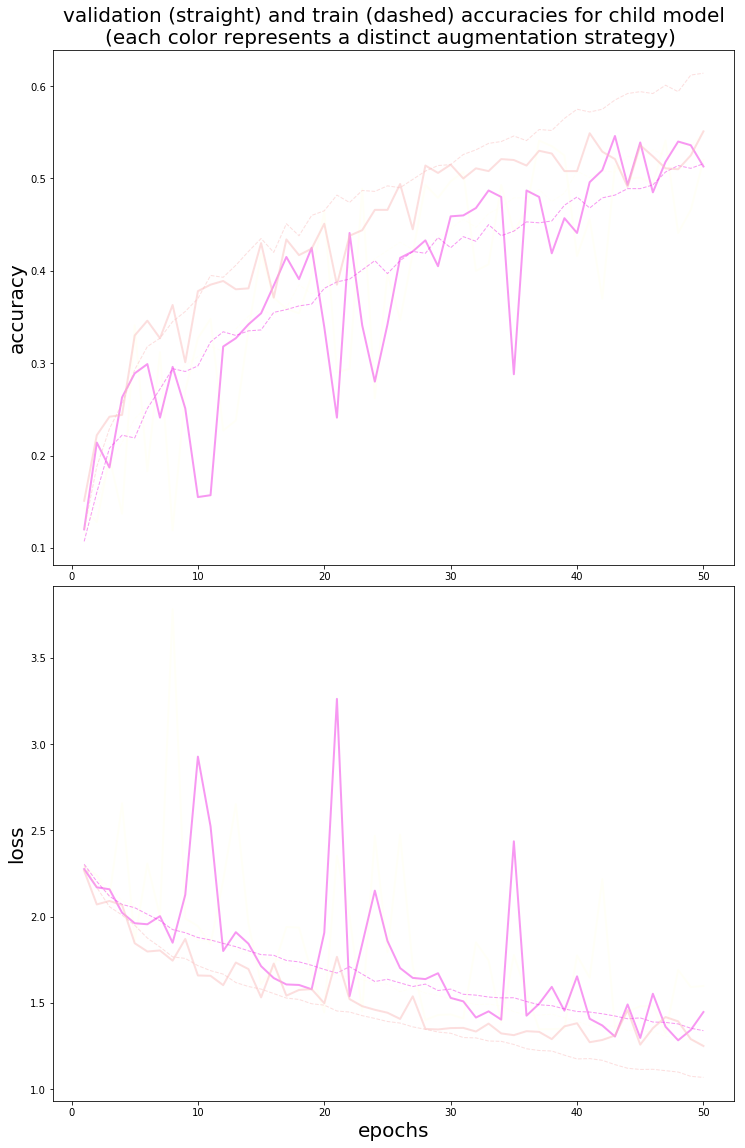

In [25]:
top3_non_overfitting = (non_overfitting_exp_df.drop_duplicates("trial_no")
                            .sort_values("reward",ascending=False)["trial_no"]
                            .values[:3]
                       )

plot_exp_lines(non_overfitting_exp_df[non_overfitting_exp_df["trial_no"].isin(top3_non_overfitting)])

In [26]:
np.array_split(np.arange(8) , 20)

[array([0]),
 array([1]),
 array([2]),
 array([3]),
 array([4]),
 array([5]),
 array([6]),
 array([7]),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64)]

In [27]:
rowList=[]
for x in range(len(exp_df["trial_no"].unique())):
    ind = x*50+49
    reward = exp_df.iloc[ind]["reward"]
    val_acc = exp_df.iloc[ind]["val_acc"]
    rowList.append([reward, val_acc])
rv_df = pd.DataFrame(rowList, columns=["reward","val_acc"])
rv_df.head()

,reward,val_acc
0,0.395,0.466
1,0.495,0.540
2,0.472,0.478
3,0.416,0.541
4,0.446,0.480


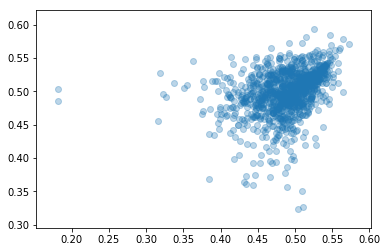

In [30]:
plt.scatter(rv_df["reward"],rv_df["val_acc"], alpha=0.3)